In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, concatenate, GRU, LSTM, BatchNormalization, Dropout, Flatten, Embedding
from keras.models import Model
from keras.optimizers import Nadam
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, cohen_kappa_score, matthews_corrcoef, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [30]:
df = pd.read_csv(open("df_whole.csv", 'rb'))
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176954 entries, 0 to 176953
Columns: 145 entries, seq_overlap to fickett_score-full-sequence
dtypes: float64(138), int64(5), object(2)
memory usage: 195.8+ MB


In [ ]:
df['label'].value_counts()

label
1    95558
0    81396
Name: count, dtype: int64

In [ ]:
df.head()

seq_overlap  \
0  ATCGATTGTCAGTGGTTCCTTTTCATCCATTGATACTGCACGCTGG...   
1  AGTAACCTTAGCGTTATCGCGATCCACCGCCAGCAGATACTGCGTC...   
2  AGCTGGACAAAAACAGCAAATACCGTAGCTATTATTATTGGCGTCC...   
3  CTCCATGCTGCTTTCAGTATTTGTGGCAATGAGCCTGACCCCTGCC...   
4  AAACAGTATTCAGGGGTCAATGTCCTGAAAGGCATCGATTTTACGT...   

                                             seq_med  label  n_start  n_end  \
0  GAAGCTAAACTCGTCACCTTCACGGACAACACGGGCTGACAGGCTG...      1        0    299   
1  GGTAAACAACGACGCGTACTCTTCATAAATACGCACGGCGCGATAA...      0        0      0   
2  ACTATATCAATCAGCAGGCAGAGCCGAAGCCCTTTCAGCCAAATGG...      1        0    299   
3  ACCTTCCGGTGCCACCATGGTTAACACCACGAAAGTGCTGCAACAG...      1        0    299   
4  CAGAAAATGAAGAACTTGCTGGCGGCGCTGGGCTGCCAGTTTGATC...      1        0    299   

         AA        AC        AG        AT        CA  ...  std_ORF_length  \
0  0.070234  0.086957  0.050167  0.056856  0.073579  ...       21.266170   
1  0.080268  0.060201  0.033445  0.063545  0.066890  ...       16.085708   
2  0.110368  0.036789  0.083612  0.093645  0.080268  ...       26.495283   
3  0.083612  0.060201  0.050167  0.043478  0.063545  ...        0.000000   
4  0.063545  0.033445  0.036789  0.070234  0.030100  ...       51.000000   

   average_ORF_length  cv_ORF_length  maximum_GC_content_ORF  \
0                31.5       0.675117               61.538462   
1                37.5       0.428952               61.111111   
2                36.0       0.735980               48.611111   
3               144.0       0.000000               55.555556   
4                93.0       0.548387               59.523810   

   minimum_GC_content_ORF  std_GC_content_ORF  average_GC_content_ORF  \
0               33.333333           11.231747               52.586996   
1               25.000000           14.074283               48.958333   
2               37.037037            4.786439               43.364198   
3               55.555556            0.000000               55.555556   
4               51.388889            4.067460               55.456349   

   cv_GC_content_ORF  fickett_score-ORF  fickett_score-full-sequence  
0           0.213584             1.1004                      0.44552  
1           0.287475             1.2250                      0.41599  
2           0.110378             1.1274                      0.47360  
3           0.000000             1.2952                      0.44369  
4           0.073345             1.2560                      0.44988  

[5 rows x 145 columns]

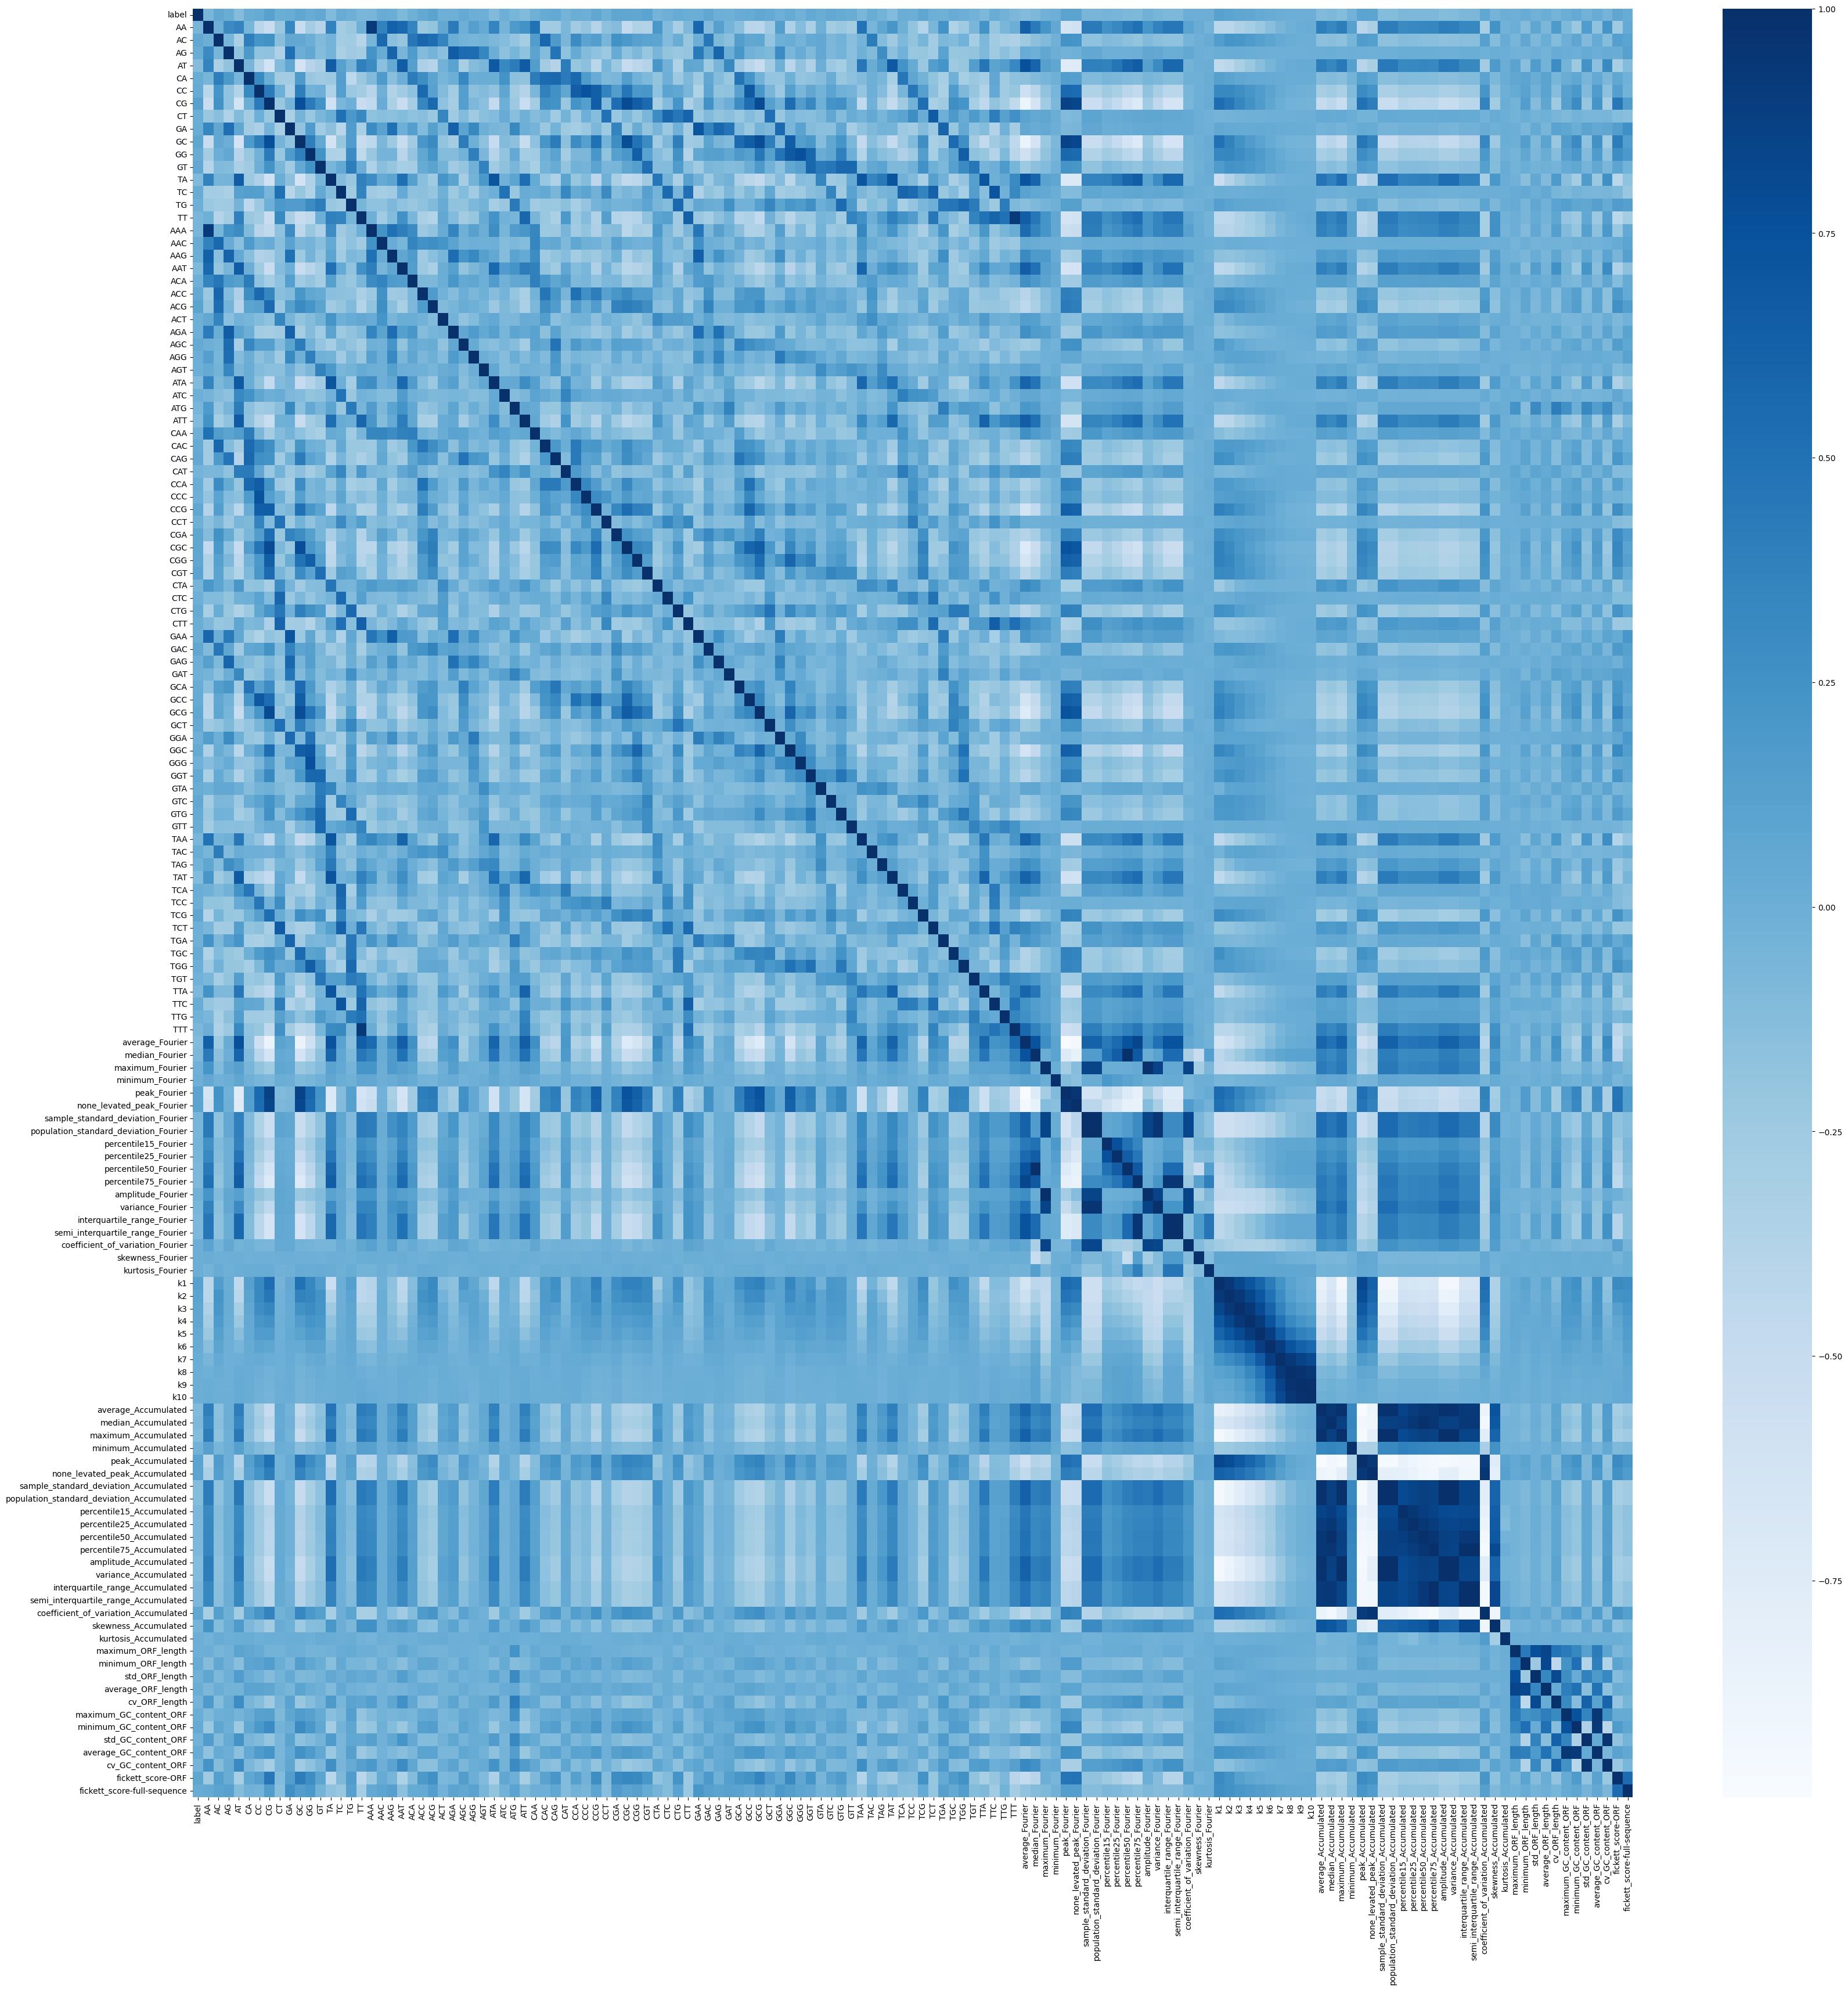

In [ ]:
plt.figure(figsize = (40, 40))
sns.heatmap(df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1).corr(), cmap = 'Blues')
plt.show()

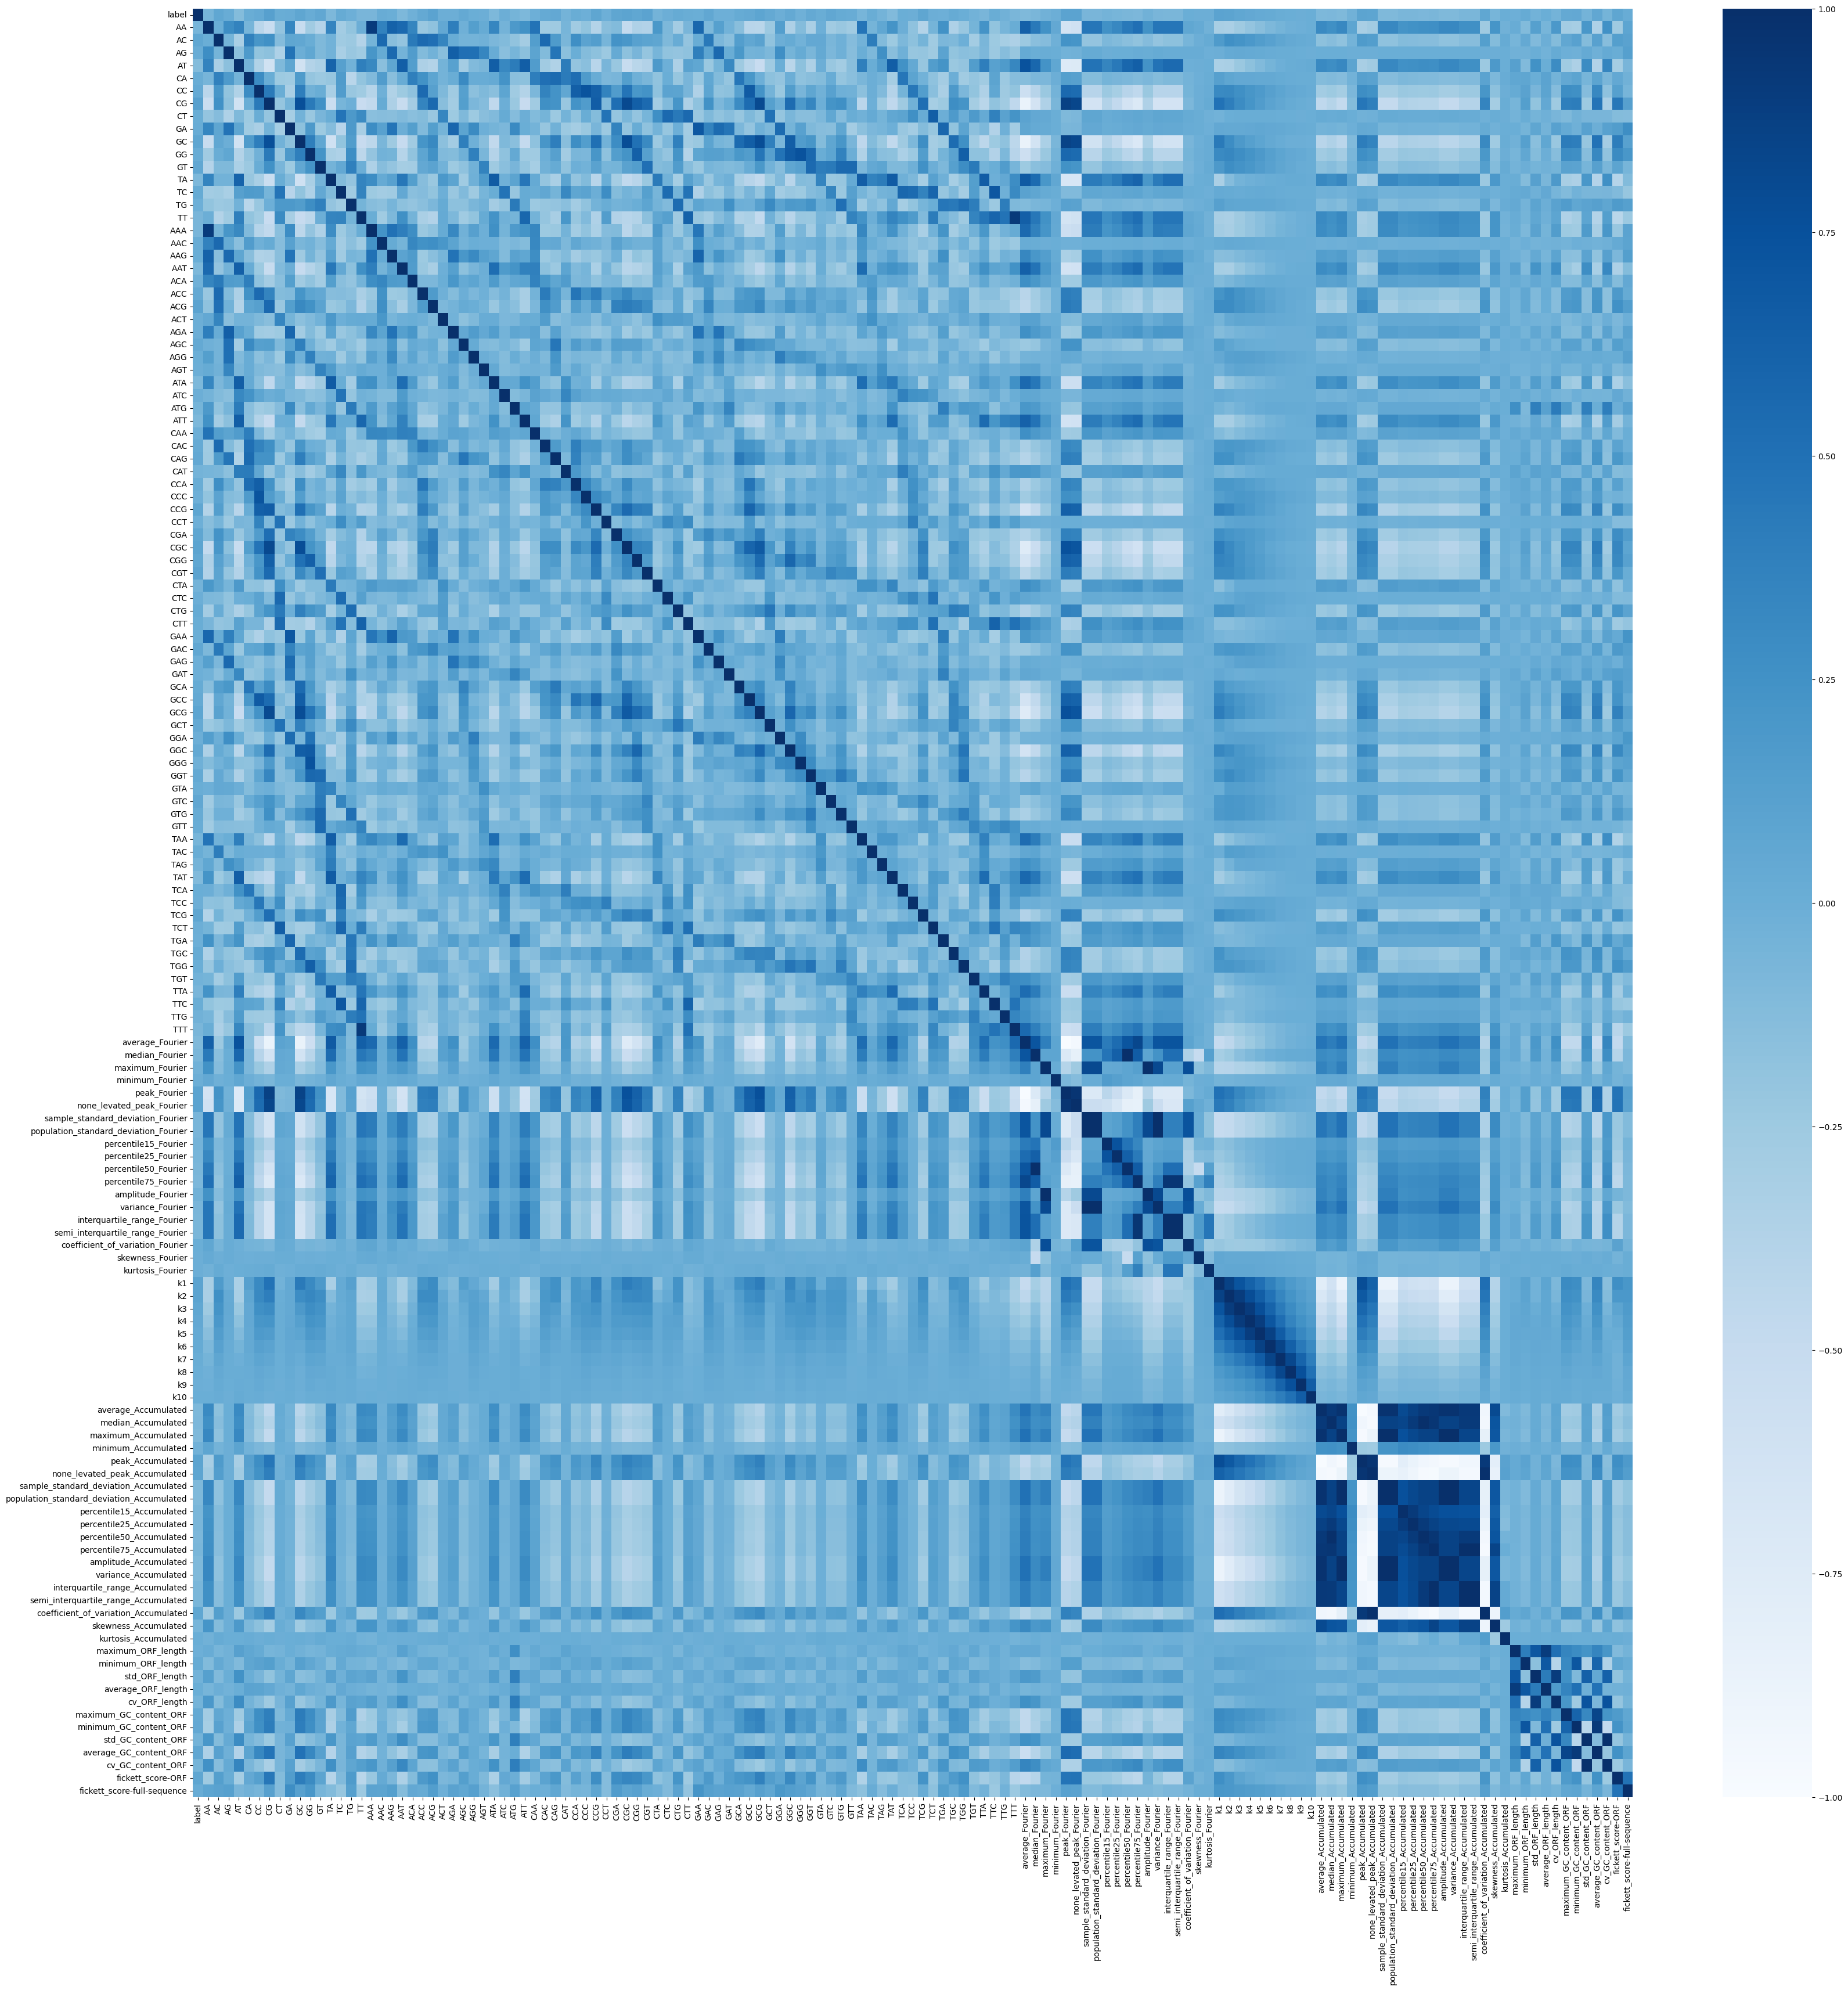

In [ ]:
plt.figure(figsize = (40, 40))
sns.heatmap(df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1).corr(method = 'spearman'), cmap = 'Blues')
plt.show()

In [ ]:
cor = df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1).corr()
cor_target = abs(cor["label"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("label" , ascending = False)[: 20]

label
label                                      1.000000
AT                                         0.126798
k1                                         0.118633
CG                                         0.117797
population_standard_deviation_Accumulated  0.112247
sample_standard_deviation_Accumulated      0.112247
amplitude_Accumulated                      0.112223
maximum_Accumulated                        0.112223
variance_Accumulated                       0.110308
TAT                                        0.109333
k2                                         0.105507
average_Fourier                            0.105377
peak_Accumulated                           0.104144
average_Accumulated                        0.103423
TA                                         0.103069
ATT                                        0.099351
CGT                                        0.098476
ATA                                        0.097844
ACG                                        0.097087
none_levated_peak_Fourier                  0.094290

In [ ]:
cor = df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1).corr(method = 'spearman')
cor_target = abs(cor["label"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("label" , ascending = False)[: 20]

label
label                                      1.000000
AT                                         0.120713
CG                                         0.118181
TAT                                        0.102855
k1                                         0.099585
variance_Accumulated                       0.097838
population_standard_deviation_Accumulated  0.097838
sample_standard_deviation_Accumulated      0.097838
maximum_Accumulated                        0.097823
amplitude_Accumulated                      0.097823
CGT                                        0.096680
peak_Fourier                               0.096419
average_Fourier                            0.096415
ACG                                        0.095808
none_levated_peak_Fourier                  0.094680
peak_Accumulated                           0.092512
average_Accumulated                        0.092512
ATA                                        0.092201
ATT                                        0.091813
k2                                         0.088977

In [ ]:
cor_target = df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1).corr(method = 'spearman')['label']
cor_with_random = df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1).corrwith(df['random_variable'], method = 'spearman')
relevant_features = cor_target[abs(cor_target) < abs(cor_with_random)]
print(relevant_features)

AAG                 0.006011
TCC                -0.000279
TGG                 0.001101
skewness_Fourier   -0.001017
k9                 -0.000008
random_variable     0.000732
Name: label, dtype: float64


In [31]:
df = df.drop(['AAG', 'TCC', 'TGG', 'skewness_Fourier', 'k9'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176954 entries, 0 to 176953
Columns: 140 entries, seq_overlap to fickett_score-full-sequence
dtypes: float64(133), int64(5), object(2)
memory usage: 189.0+ MB


In [ ]:
forestmodel = RandomForestClassifier(n_estimators = 2048, max_depth = 11)
forestmodel.fit(df.drop(['label', 'seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1), df['label'])

feature_importances = forestmodel.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': df.drop(['label', 'seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1).columns,
                                      'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']} : {row['Importance']:.4f}")

CG : 0.0369
average_Fourier : 0.0275
AT : 0.0264
peak_Fourier : 0.0240
none_levated_peak_Fourier : 0.0233
k1 : 0.0171
GC : 0.0152
fickett_score-ORF : 0.0145
ACG : 0.0130
CGT : 0.0126
TA : 0.0118
TAT : 0.0117
variance_Accumulated : 0.0117
GGG : 0.0115
k2 : 0.0115
population_standard_deviation_Accumulated : 0.0114
CTT : 0.0114
sample_standard_deviation_Accumulated : 0.0110
maximum_Accumulated : 0.0107
percentile75_Fourier : 0.0104
amplitude_Accumulated : 0.0103
CGC : 0.0102
AC : 0.0094
k3 : 0.0093
ATA : 0.0092
fickett_score-full-sequence : 0.0091
TTC : 0.0089
GG : 0.0088
TTT : 0.0088
CC : 0.0085
median_Fourier : 0.0085
percentile50_Fourier : 0.0084
k4 : 0.0083
TC : 0.0083
semi_interquartile_range_Fourier : 0.0079
interquartile_range_Fourier : 0.0078
k5 : 0.0077
TT : 0.0077
variance_Fourier : 0.0076
average_GC_content_ORF : 0.0076
GCG : 0.0076
peak_Accumulated : 0.0076
GT : 0.0076
population_standard_deviation_Fourier : 0.0076
average_Accumulated : 0.0075
sample_standard_deviation_Fourier

C:\Users\misha\AppData\Local\Temp\ipykernel_7096\1437758562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Importance', y = df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end', 'label'], axis = 1).columns[:l],


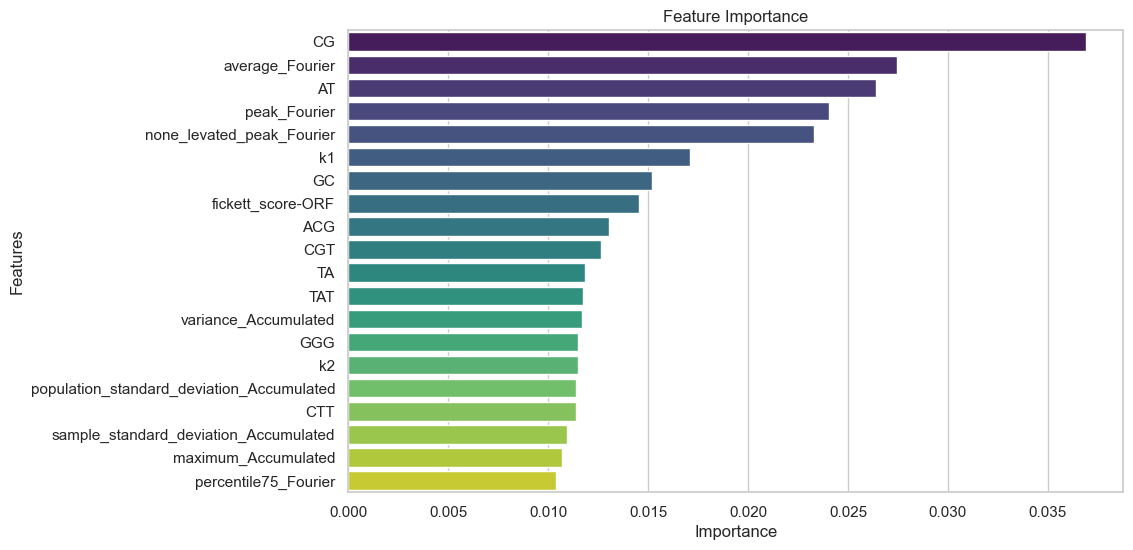

In [ ]:
l = 20
sns.set(style="whitegrid")

plt.figure(figsize = (10, 6))
sns.barplot(x = 'Importance', y = df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end', 'label'], axis = 1).columns[:l],
             data = feature_importance_df[:l], palette = "viridis")

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig("teature_importanse.png")

plt.show()

In [ ]:
top_features = feature_importance_df.head(40)['Feature'].tolist()
top_features

['CG',
 'average_Fourier',
 'AT',
 'peak_Fourier',
 'none_levated_peak_Fourier',
 'k1',
 'GC',
 'fickett_score-ORF',
 'ACG',
 'CGT',
 'TA',
 'TAT',
 'variance_Accumulated',
 'GGG',
 'k2',
 'population_standard_deviation_Accumulated',
 'CTT',
 'sample_standard_deviation_Accumulated',
 'maximum_Accumulated',
 'percentile75_Fourier',
 'amplitude_Accumulated',
 'CGC',
 'AC',
 'k3',
 'ATA',
 'fickett_score-full-sequence',
 'TTC',
 'GG',
 'TTT',
 'CC',
 'median_Fourier',
 'percentile50_Fourier',
 'k4',
 'TC',
 'semi_interquartile_range_Fourier',
 'interquartile_range_Fourier',
 'k5',
 'TT',
 'variance_Fourier',
 'average_GC_content_ORF']

In [ ]:
top_features = ['CG',
                'average_Fourier',
                'AT',
                'peak_Fourier',
                'none_levated_peak_Fourier',
                'k1',
                'GC',
                'fickett_score-ORF',
                'ACG',
                'CGT',
                'TA',
                'TAT',
                'variance_Accumulated',
                'GGG',
                'k2',
                'population_standard_deviation_Accumulated',
                'CTT',
                'sample_standard_deviation_Accumulated',
                'maximum_Accumulated',
                'percentile75_Fourier',
                'amplitude_Accumulated',
                'CGC',
                'AC',
                'k3',
                'ATA',
                'fickett_score-full-sequence',
                'TTC',
                'GG',
                'TTT',
                'CC',
                'median_Fourier',
                'percentile50_Fourier',
                'k4',
                'TC',
                'semi_interquartile_range_Fourier',
                'interquartile_range_Fourier',
                'k5',
                'TT',
                'variance_Fourier',
                'average_GC_content_ORF']

df = df[top_features + ['seq_overlap', 'seq_med', 'n_start', 'n_end', 'label']]

In [ ]:
df.head(20)

CG  average_Fourier        AT  peak_Fourier  \
0   0.076923            381.0  0.056856      0.262467   
1   0.107023            347.0  0.063545      0.288184   
2   0.030100            421.0  0.093645      0.237530   
3   0.080268            361.0  0.043478      0.277008   
4   0.096990            343.0  0.070234      0.291545   
5   0.036789            427.0  0.103679      0.234192   
6   0.043478            423.0  0.066890      0.236407   
7   0.056856            405.0  0.066890      0.246914   
8   0.073579            377.0  0.053512      0.265252   
9   0.086957            351.0  0.050167      0.284900   
10  0.090301            367.0  0.073579      0.272480   
11  0.026756            489.0  0.123746      0.204499   
12  0.086957            339.0  0.043478      0.294985   
13  0.063545            415.0  0.053512      0.240964   
14  0.053512            411.0  0.093645      0.243309   
15  0.053512            421.0  0.093645      0.237530   
16  0.113712            325.0  0.056856      0.307692   
17  0.090301            363.0  0.030100      0.275482   
18  0.063545            401.0  0.100334      0.249377   
19  0.046823            407.0  0.070234      0.245700   

    none_levated_peak_Fourier        k1        GC  fickett_score-ORF  \
0                    5.780577  1.998517  0.070234             1.1004   
1                    6.106303  1.993012  0.107023             1.2250   
2                    5.576850  1.972394  0.056856             1.1274   
3                    6.106677  1.997170  0.066890             1.2952   
4                    6.170549  1.988668  0.113712             1.2560   
5                    5.613298  1.966152  0.060201             1.1386   
6                    5.630819  1.964154  0.076923             0.8003   
7                    5.671859  1.987578  0.076923             0.8463   
8                    5.837295  1.992519  0.056856             0.8669   
9                    6.095009  1.971421  0.080268             1.2713   
10                   5.930322  1.960839  0.107023             1.0384   
11                   5.120817  1.865696  0.013378             0.7754   
12                   6.080607  1.970986  0.093645             1.2003   
13                   5.734095  1.981485  0.053512             1.1016   
14                   5.648324  1.975130  0.063545             1.0979   
15                   5.387415  1.966035  0.043478             0.9471   
16                   6.324272  1.944590  0.107023             1.0966   
17                   6.061648  1.975987  0.076923             0.9319   
18                   5.579676  1.976359  0.076923             1.1037   
19                   5.728616  1.990106  0.060201             1.0302   

         ACG       CGT  ...  interquartile_range_Fourier        k5        TT  \
0   0.030201  0.016779  ...                   379.389404  7.920569  0.080268   
1   0.026846  0.010067  ...                   387.068540  7.844456  0.056856   
2   0.006711  0.000000  ...                   560.930488  7.720284  0.086957   
3   0.013423  0.030201  ...                   369.216273  7.881685  0.063545   
4   0.006711  0.006711  ...                   324.510181  7.759931  0.060201   
5   0.010067  0.006711  ...                   529.682901  7.852107  0.130435   
6   0.000000  0.006711  ...                   423.929706  7.667549  0.137124   
7   0.013423  0.013423  ...                   463.707996  7.825080  0.117057   
8   0.016779  0.026846  ...                   436.752579  7.934083  0.090301   
9   0.033557  0.013423  ...                   393.036541  7.844456  0.053512   
10  0.000000  0.006711  ...                   427.763925  7.653479  0.137124   
11  0.006711  0.016779  ...                   511.052722  7.598325  0.163880   
12  0.023490  0.010067  ...                   372.745901  7.698358  0.040134   
13  0.016779  0.026846  ...                   448.395873  7.880790  0.080268   
14  0.003356  0.020134  ...                   496.735246  7.806466  0.083612   
15  0.013423  0.016

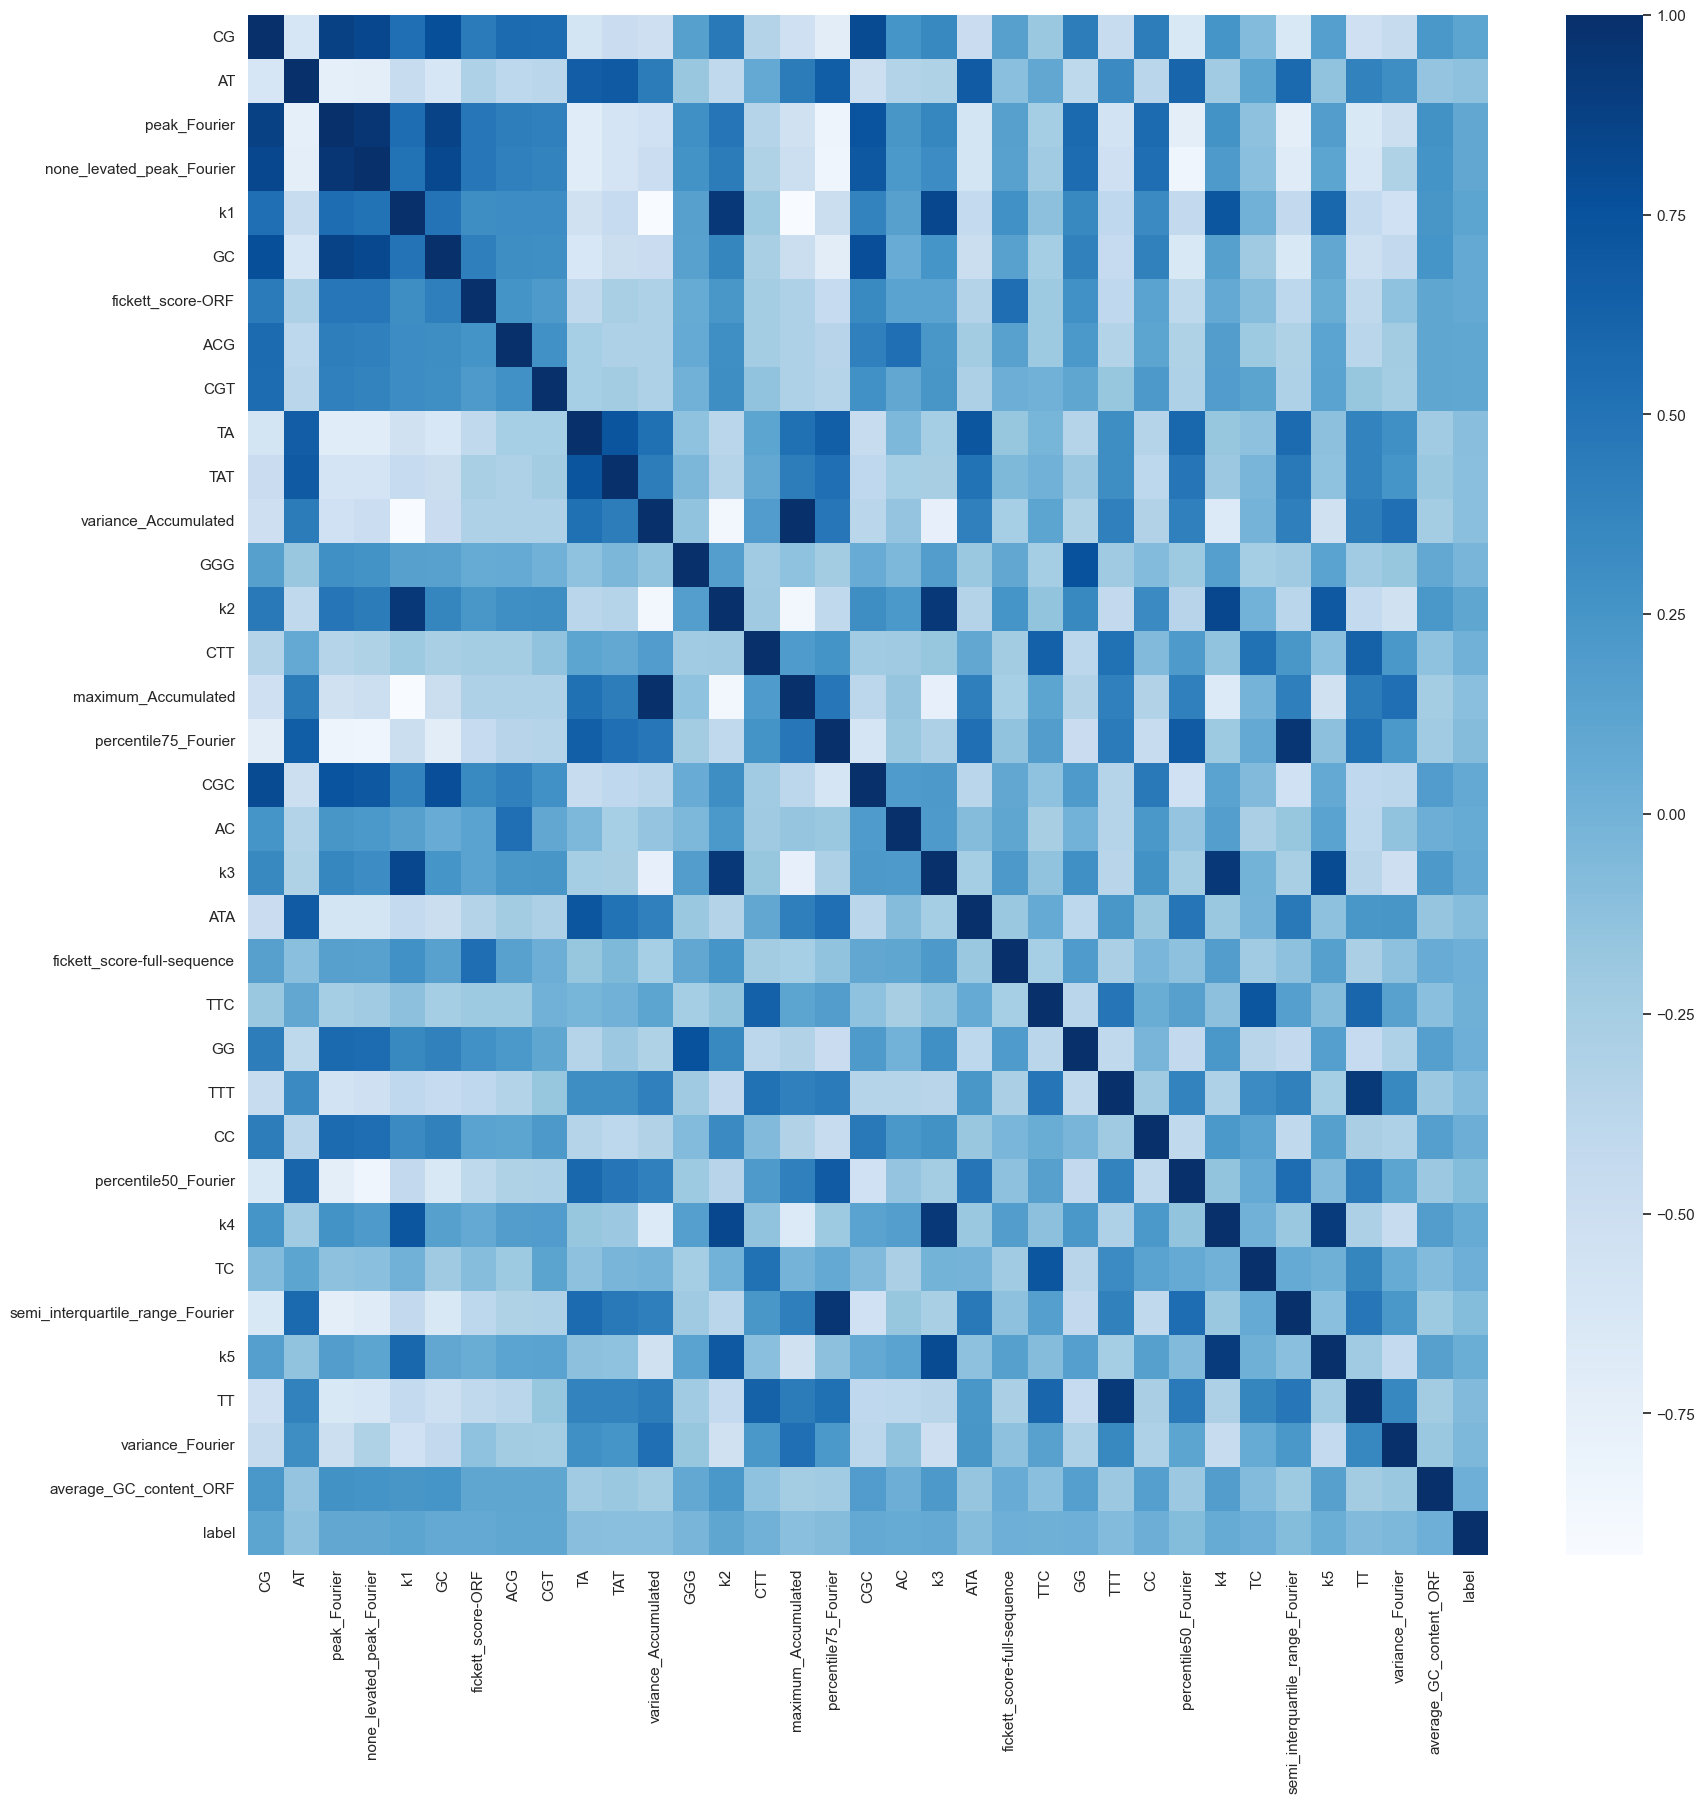

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1).corr(), cmap = 'Blues')
plt.show()

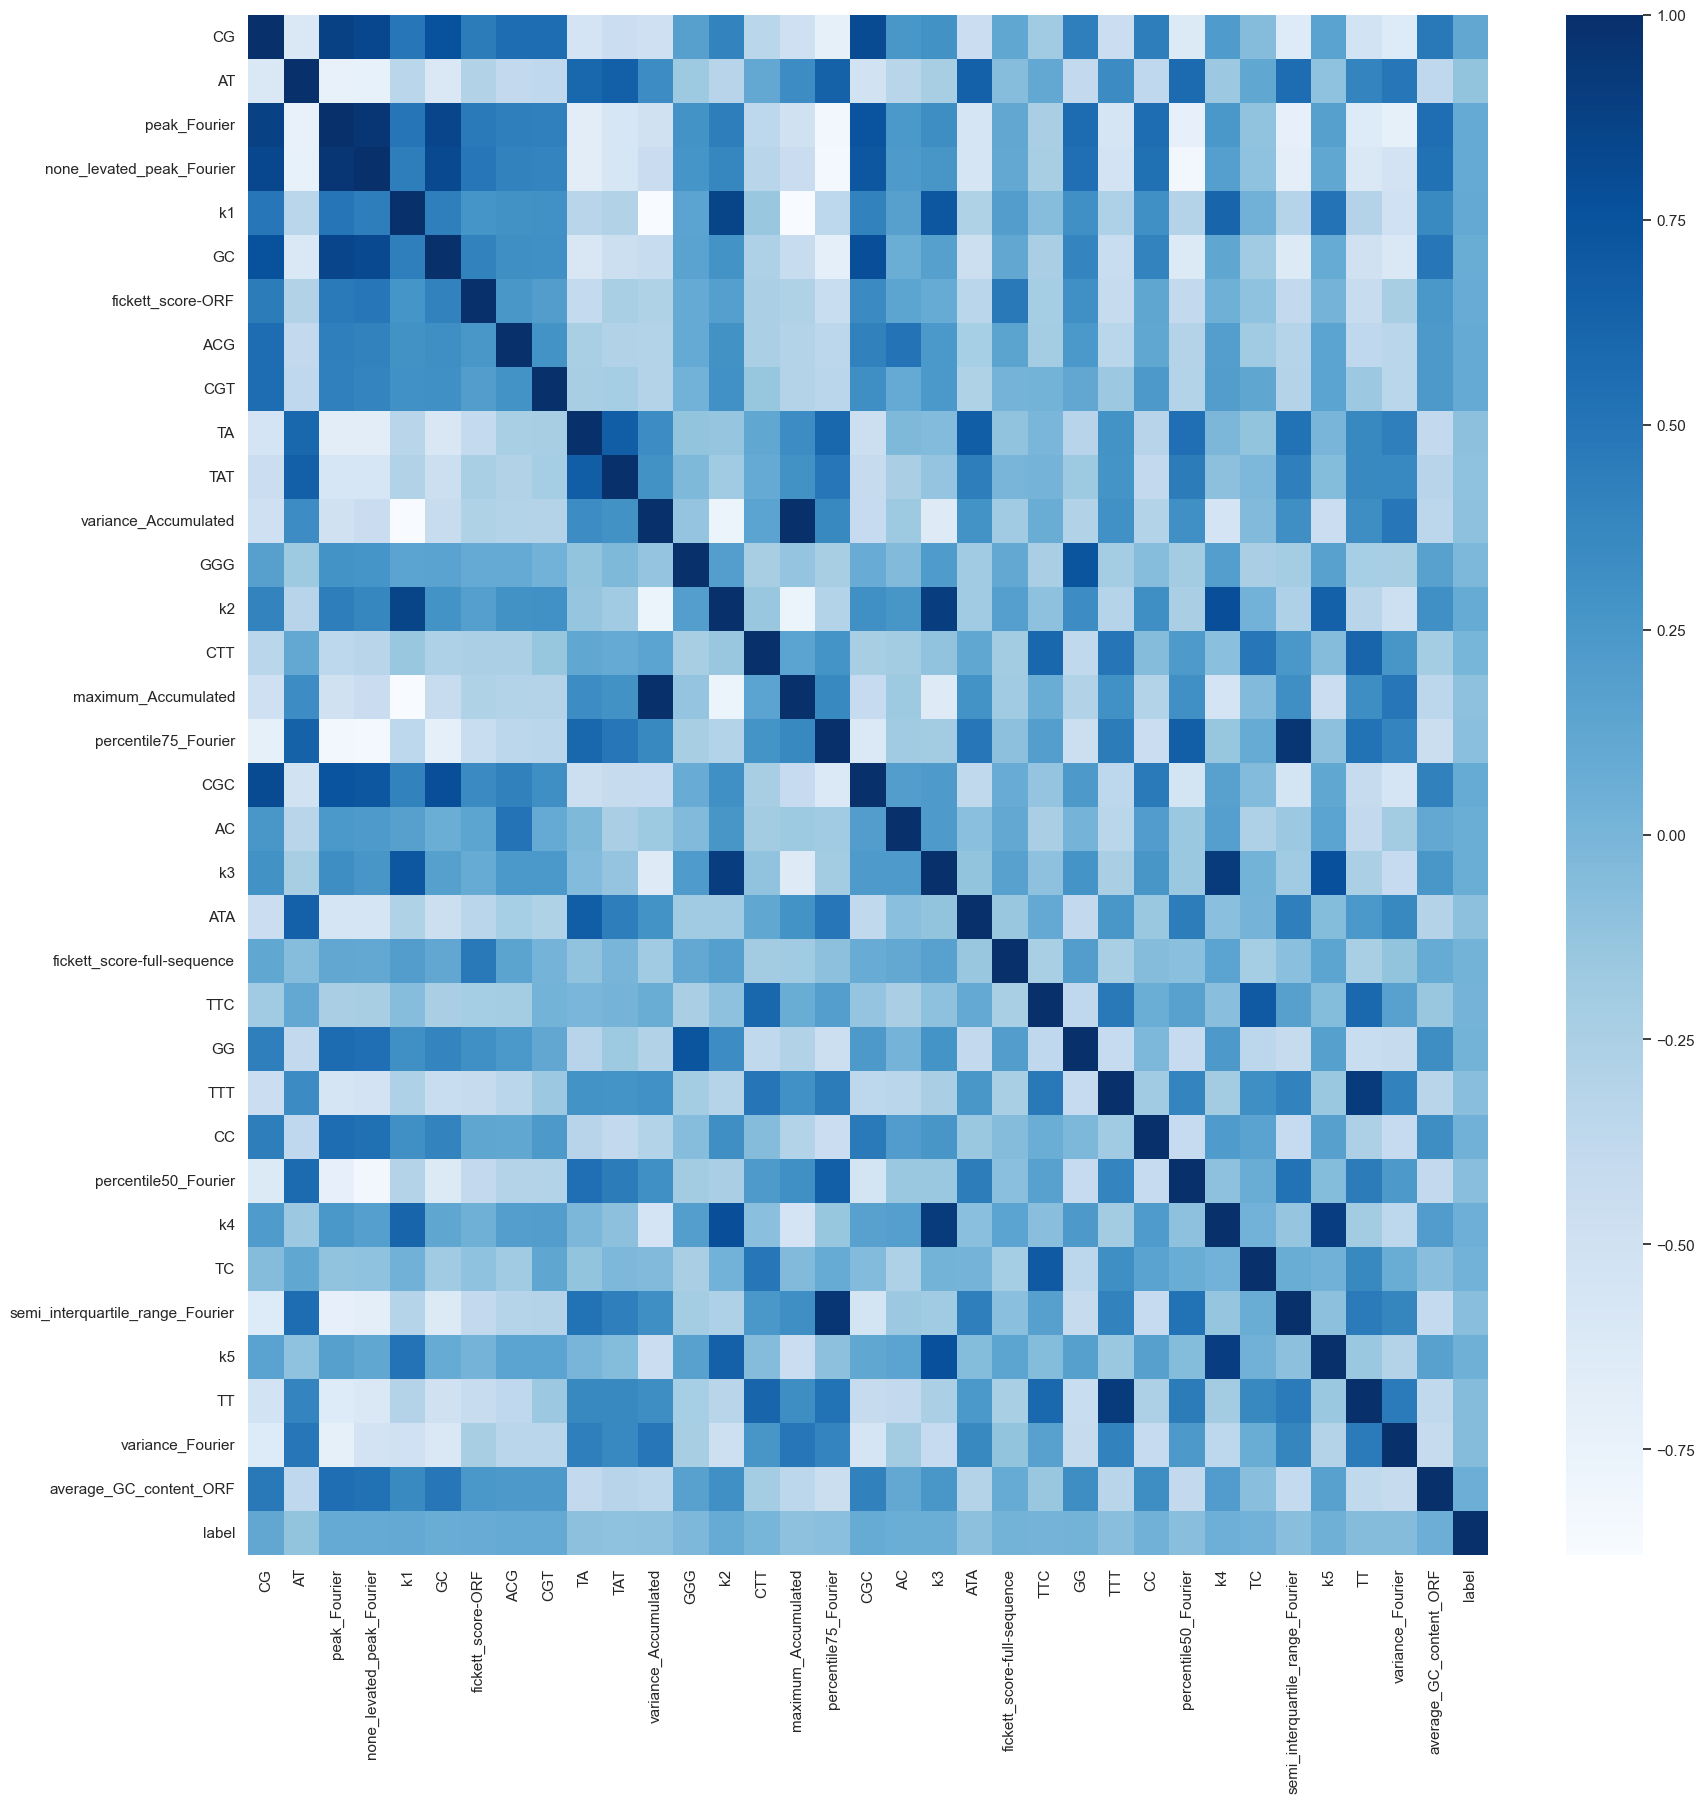

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1).corr(method = 'spearman'), cmap = 'Blues')
plt.show()

In [33]:
df = df.drop(['sample_standard_deviation_Accumulated', 
              'population_standard_deviation_Accumulated', 
              'amplitude_Accumulated', 'average_Fourier',
              'median_Fourier', 'interquartile_range_Fourier'], axis = 1)


C:\Users\misha\AppData\Local\Temp\ipykernel_7096\1980670898.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = relevant_features["label"].iloc[1:l], y = relevant_features.index[1:l], palette = "viridis")


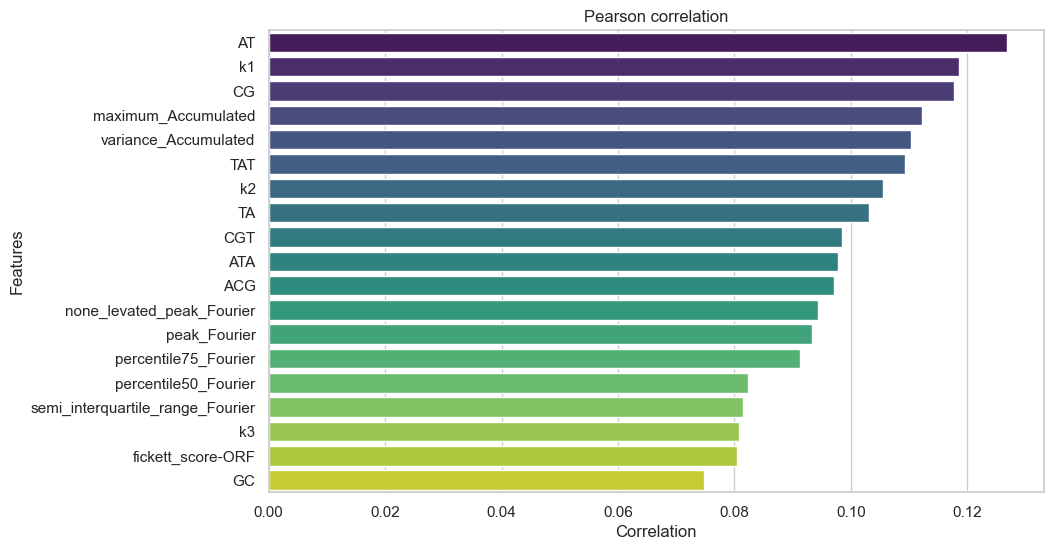

In [ ]:
cor = df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1).corr()
cor_target = abs(cor["label"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features = relevant_features.sort_values("label" , ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(x = relevant_features["label"].iloc[1:l], y = relevant_features.index[1:l], palette = "viridis")

plt.title('Pearson correlation')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.savefig("Pearson correlation.png")
plt.show()

C:\Users\misha\AppData\Local\Temp\ipykernel_7096\1298611228.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = relevant_features["label"].iloc[1:l], y = relevant_features.index[1:l], palette = "viridis")


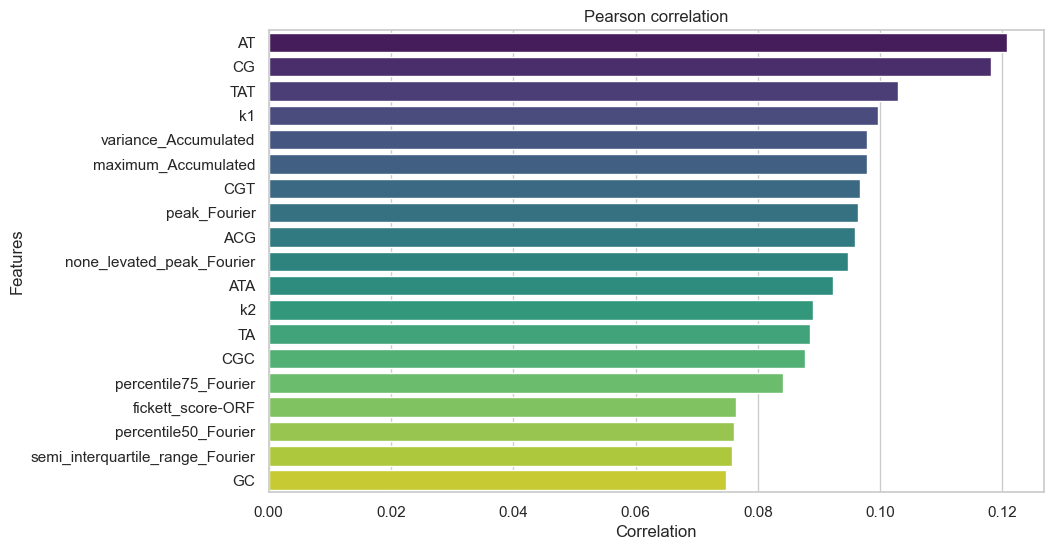

In [ ]:
cor = df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end'], axis = 1).corr(method = 'spearman')
cor_target = abs(cor["label"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features = relevant_features.sort_values("label" , ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(x = relevant_features["label"].iloc[1:l], y = relevant_features.index[1:l], palette = "viridis")

plt.title('Pearson correlation')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.savefig("Pearson correlation.png")
plt.show()

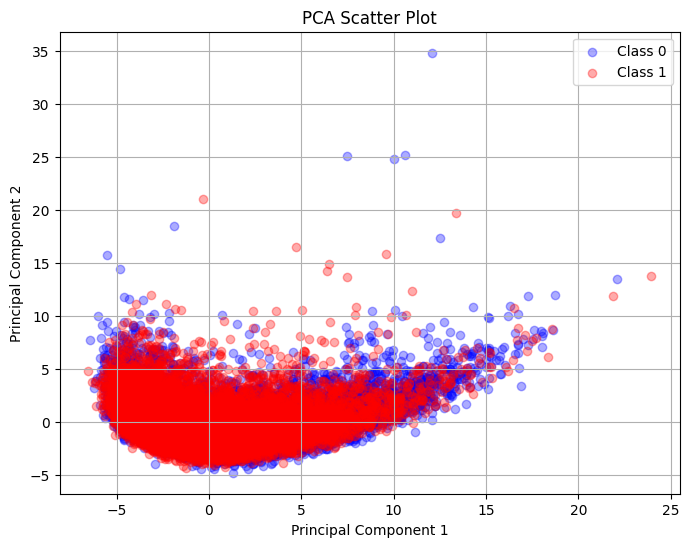

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end', 'label'], axis = 1).iloc[: 30000, :])

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

evinced_interaction_column = df['label'].iloc[: 30000]

filtered_class_0 = x_pca[evinced_interaction_column == 0]
filtered_class_1 = x_pca[evinced_interaction_column == 1]

plt.figure(figsize = (8, 6))
plt.scatter(filtered_class_0[:, 0], filtered_class_0[:, 1], c = 'blue', label = 'Class 0', alpha = 0.33)
plt.scatter(filtered_class_1[:, 0], filtered_class_1[:, 1], c = 'red', label = 'Class 1', alpha = 0.33)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

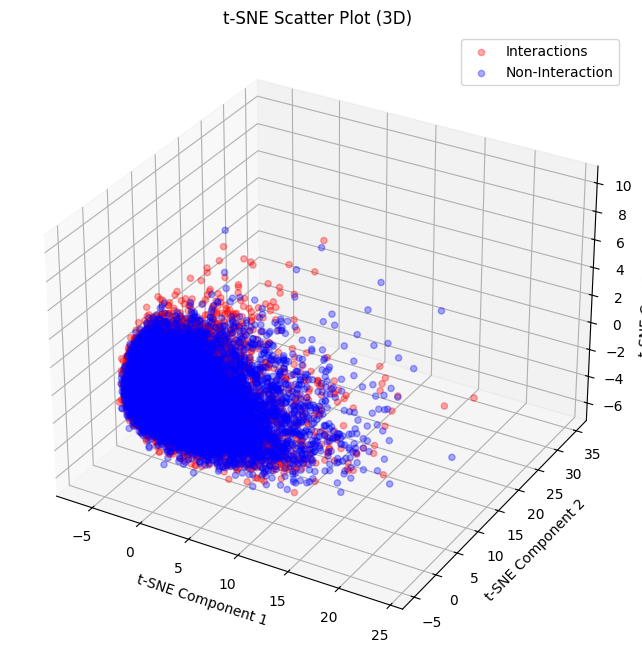

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end', 'label'], axis = 1).iloc[: 30000, :])

pca = PCA(n_components = 3)
x_pca = pca.fit_transform(x_scaled)

evinced_interaction_column = df['label'].iloc[: 30000]

filtered_class_0_umap = x_pca[evinced_interaction_column == 0]
filtered_class_1_umap = x_pca[evinced_interaction_column == 1]

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(filtered_class_1_umap[:, 0], filtered_class_1_umap[:, 1], filtered_class_1_umap[:, 2], c = 'red', label = 'Interactions', alpha = 0.33)
ax.scatter(filtered_class_0_umap[:, 0], filtered_class_0_umap[:, 1], filtered_class_0_umap[:, 2], c = 'blue', label = 'Non-Interaction', alpha = 0.33)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE Scatter Plot (3D)')
ax.legend()
plt.show()

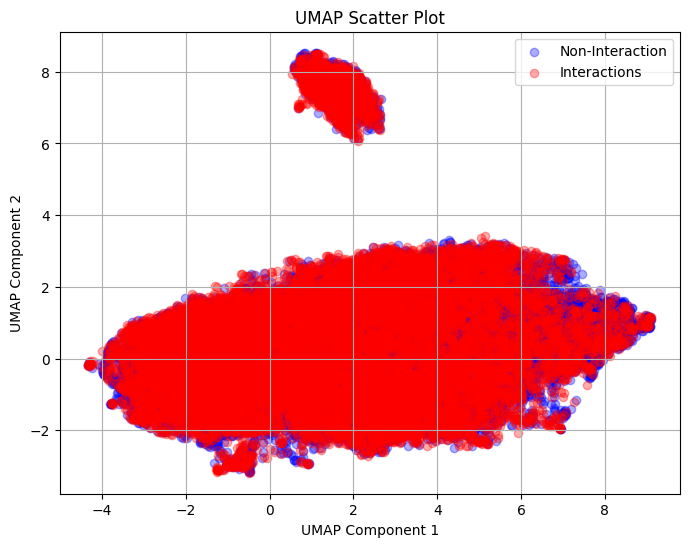

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end', 'label'], axis = 1).iloc[: 30000, :])

umap_model = umap.UMAP(n_components = 2)
x_umap = umap_model.fit_transform(x_scaled)

evinced_interaction_column = df['label'].iloc[: 30000]

filtered_class_0_umap = x_umap[evinced_interaction_column == 0]
filtered_class_1_umap = x_umap[evinced_interaction_column == 1]

plt.figure(figsize = (8, 6))
plt.scatter(filtered_class_0_umap[:, 0], filtered_class_0_umap[:, 1], c = 'blue', label = 'Non-Interaction', alpha = 0.33)
plt.scatter(filtered_class_1_umap[:, 0], filtered_class_1_umap[:, 1], c = 'red', label = 'Interactions', alpha = 0.33)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

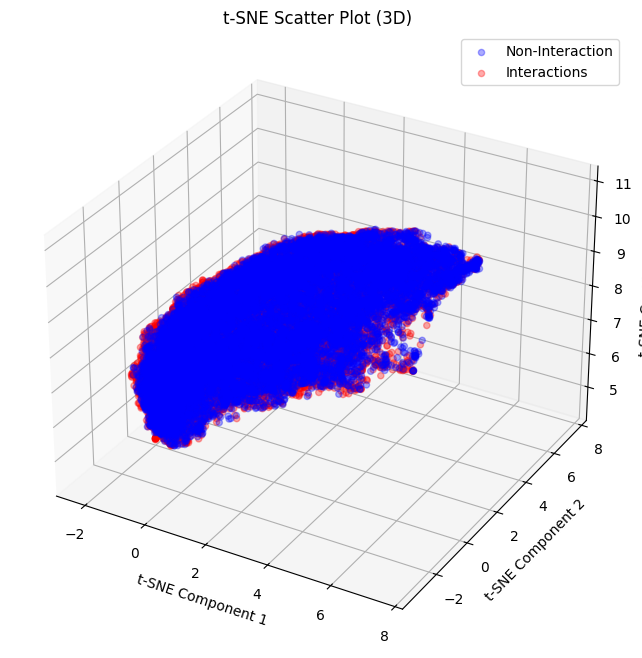

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end', 'label'], axis = 1).iloc[: 30000, :])

umap_model = umap.UMAP(n_components=3)
x_umap = umap_model.fit_transform(x_scaled)

evinced_interaction_column = df['label'].iloc[: 30000]

filtered_class_0_umap = x_umap[evinced_interaction_column == 0]
filtered_class_1_umap = x_umap[evinced_interaction_column == 1]

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(filtered_class_0_umap[:, 0], filtered_class_0_umap[:, 1], filtered_class_0_umap[:, 2], c = 'blue', label = 'Non-Interaction', alpha = 0.33)
ax.scatter(filtered_class_1_umap[:, 0], filtered_class_1_umap[:, 1], filtered_class_1_umap[:, 2], c = 'red', label = 'Interactions', alpha = 0.33)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE Scatter Plot (3D)')
ax.legend()
plt.show()


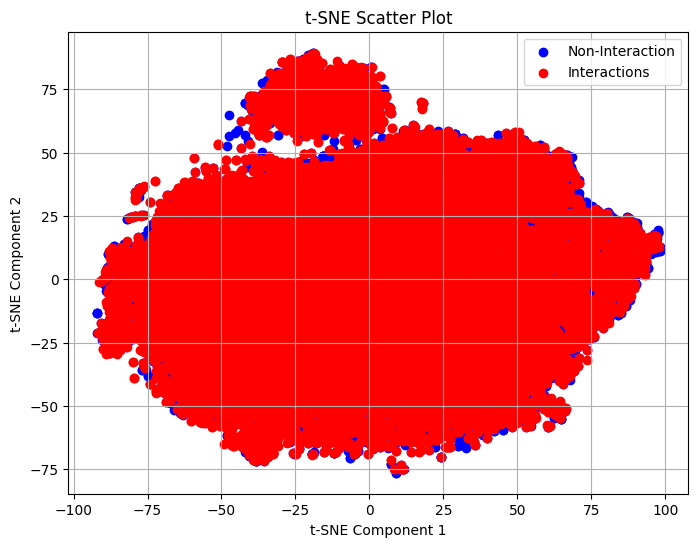

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end', 'label'], axis = 1).iloc[: 30000, :])

tsne_model = TSNE(n_components = 2, random_state = 42)
x_tsne = tsne_model.fit_transform(x_scaled)

evinced_interaction_column = df['label'].iloc[: 30000]

filtered_class_0_tsne = x_tsne[evinced_interaction_column == 0]
filtered_class_1_tsne = x_tsne[evinced_interaction_column == 1]

plt.figure(figsize = (8, 6))
plt.scatter(filtered_class_0_tsne[:, 0], filtered_class_0_tsne[:, 1], c = 'blue', label = 'Non-Interaction')
plt.scatter(filtered_class_1_tsne[:, 0], filtered_class_1_tsne[:, 1], c = 'red', label = 'Interactions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

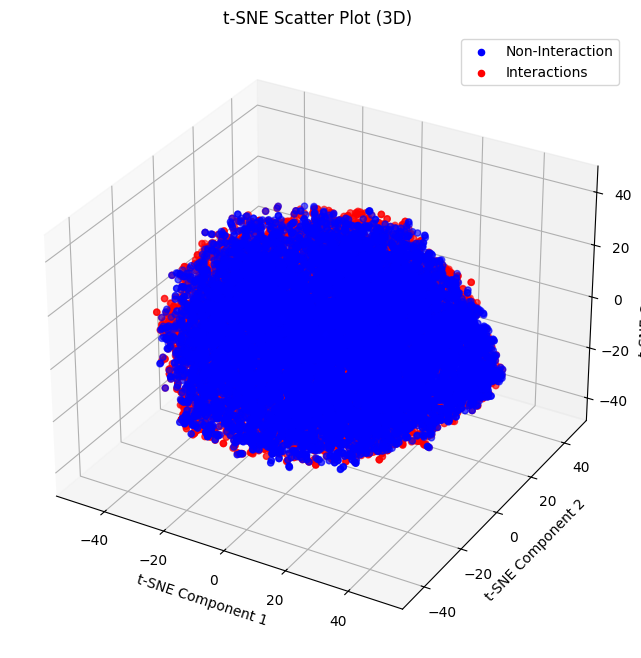

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop(['seq_overlap', 'seq_med', 'n_start', 'n_end', 'label'], axis = 1).iloc[: 30000, :])

tsne_model = TSNE(n_components = 3, random_state = 42)
x_tsne = tsne_model.fit_transform(x_scaled)

evinced_interaction_column = df['label'].iloc[: 30000]

filtered_class_0_tsne = x_tsne[evinced_interaction_column == 0]
filtered_class_1_tsne = x_tsne[evinced_interaction_column == 1]

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(filtered_class_0_tsne[:, 0], filtered_class_0_tsne[:, 1], filtered_class_0_tsne[:, 2], c = 'blue', label='Non-Interaction')
ax.scatter(filtered_class_1_tsne[:, 0], filtered_class_1_tsne[:, 1], filtered_class_1_tsne[:, 2], c = 'red', label='Interactions')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE Scatter Plot (3D)')
ax.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['label', 'n_start', 'n_end'], axis = 1),
                                                     df['label'], train_size = 0.8, random_state = 1212)

X_train_seq1 = X_train['seq_overlap']
X_train_seq2 = X_train['seq_med']
X_train = X_train.drop(['seq_overlap', 'seq_med'], axis = 1)

X_test_seq1 = X_test['seq_overlap']
X_test_seq2 = X_test['seq_med']
X_test = X_test.drop(['seq_overlap', 'seq_med'], axis = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components = 20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level = True)
tokenizer.fit_on_texts(X_test_seq1)
X_train_seq1 = np.array(tokenizer.texts_to_sequences(X_train_seq1))
X_train_seq2 = np.array(tokenizer.texts_to_sequences(X_train_seq2))
X_test_seq1 = np.array(tokenizer.texts_to_sequences(X_test_seq1))
X_test_seq2 = np.array(tokenizer.texts_to_sequences(X_test_seq2))

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
X_test_seq1.shape

(35391, 900)

In [ ]:
inp_seq1 = Input(shape = (900, 1))
features1 = BatchNormalization()(inp_seq1)
features1 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = Flatten()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, 1))
features2 = BatchNormalization()(inp_seq2)
features2 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = BatchNormalization()(features2)
features2 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = Flatten()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(64, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(128, activation = 'elu')(concat)
concat = Dense(2, activation = 'softmax')(concat)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = concat)
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 900, 1)]     0           []                               
                                                                                                  
 batch_normalization_68 (BatchN  (None, 900, 1)      4           ['input_24[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 conv1d_40 (Conv1D)             (None, 900, 32)      128         ['batch_normalization_68[0][0]'] 
                                                                                                  
 max_pooling1d_40 (MaxPooling1D  (None, 450, 32)     0           ['conv1d_40[0][0]']        

In [ ]:
hist = model.fit([X_train_seq1, X_train_seq2, X_train], y_train, batch_size = 256, epochs = 20, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], y_test])

Epoch 1/20
553/553 [==============================] - 55s 85ms/step - loss: 0.7014 - accuracy: 0.5731 - val_loss: 0.6709 - val_accuracy: 0.5771
Epoch 2/20
553/553 [==============================] - 48s 86ms/step - loss: 0.6642 - accuracy: 0.5883 - val_loss: 0.7604 - val_accuracy: 0.4917
Epoch 3/20
553/553 [==============================] - 47s 85ms/step - loss: 0.6512 - accuracy: 0.6102 - val_loss: 0.6792 - val_accuracy: 0.5636
Epoch 4/20
553/553 [==============================] - 47s 85ms/step - loss: 0.6234 - accuracy: 0.6453 - val_loss: 0.7212 - val_accuracy: 0.5585
Epoch 5/20
553/553 [==============================] - 47s 84ms/step - loss: 0.5740 - accuracy: 0.6948 - val_loss: 0.6154 - val_accuracy: 0.6611
Epoch 6/20
553/553 [==============================] - 47s 85ms/step - loss: 0.5075 - accuracy: 0.7464 - val_loss: 0.6199 - val_accuracy: 0.6833
Epoch 7/20
553/553 [==============================] - 47s 84ms/step - loss: 0.4207 - accuracy: 0.8042 - val_loss: 0.6280 - val_accuracy:

1106/1106 [==============================] - 8s 7ms/step


<Axes: >

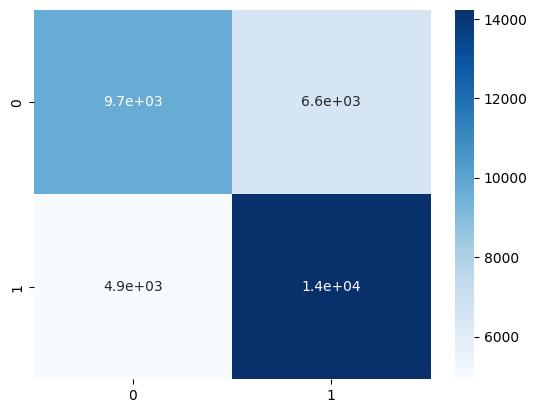

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(model.predict([X_test_seq1, X_test_seq2, X_test]), axis = 1)), annot = True, cmap = 'Blues')

In [ ]:
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(model.predict([X_test_seq1, X_test_seq2, X_test]), axis = 1)))

1106/1106 [==============================] - 8s 7ms/step
              precision    recall  f1-score   support

           0       0.66      0.60      0.63     16237
           1       0.68      0.74      0.71     19154

    accuracy                           0.68     35391
   macro avg       0.67      0.67      0.67     35391
weighted avg       0.67      0.68      0.67     35391



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['label', 'n_start', 'n_end'], axis = 1),
                                                     df[['label', 'n_start', 'n_end']], train_size = 0.8, random_state = 1212)

X_train_seq1 = X_train['seq_overlap']
X_train_seq2 = X_train['seq_med']
X_train = X_train.drop(['seq_overlap', 'seq_med'], axis = 1)

X_test_seq1 = X_test['seq_overlap']
X_test_seq2 = X_test['seq_med']
X_test = X_test.drop(['seq_overlap', 'seq_med'], axis = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components = 20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level = True)
tokenizer.fit_on_texts(X_test_seq1)
X_train_seq1 = np.array(tokenizer.texts_to_sequences(X_train_seq1))
X_train_seq2 = np.array(tokenizer.texts_to_sequences(X_train_seq2))
X_test_seq1 = np.array(tokenizer.texts_to_sequences(X_test_seq1))
X_test_seq2 = np.array(tokenizer.texts_to_sequences(X_test_seq2))

y_train_start = np.array(y_train['n_start'])
y_train_end = np.array(y_train['n_end'])
y_test_start = np.array(y_test['n_start'])
y_test_end = np.array(y_test['n_end'])
y_train = tf.keras.utils.to_categorical(y_train['label'])
y_test = tf.keras.utils.to_categorical(y_test['label'])

In [ ]:
inp_seq1 = Input(shape = (900, 1))
features1 = BatchNormalization()(inp_seq1)
features1 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = Flatten()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, 1))
features2 = BatchNormalization()(inp_seq2)
features2 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = BatchNormalization()(features2)
features2 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = Flatten()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(64, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(128, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 900, 1)]     0           []                               
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 900, 1)      4           ['input_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 conv1d_5 (Conv1D)              (None, 900, 32)      128         ['batch_normalization_5[0][0]']  
                                                                                                  
 max_pooling1d_5 (MaxPooling1D)  (None, 450, 32)     0           ['conv1d_5[0][0]']           

In [ ]:
earlystopping = EarlyStopping(monitor = 'val_out_classification_accuracy', patience = 5, restore_best_weights = True, verbose = True)
reducelr = ReduceLROnPlateau(monitor = 'val_out_classification_accuracy', patience = 3, factor = 0.1, verbose = True)

In [ ]:
hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

Epoch 1/50
553/553 [==============================] - 67s 100ms/step - loss: 21994.3145 - out_classification_loss: 0.6972 - out_start_loss: 54.4058 - out_end_loss: 21939.2227 - out_classification_accuracy: 0.5704 - out_start_accuracy: 0.3210 - out_end_accuracy: 0.0022 - val_loss: 22978.2266 - val_out_classification_loss: 0.6898 - val_out_start_loss: 53.5741 - val_out_end_loss: 22923.9648 - val_out_classification_accuracy: 0.5223 - val_out_start_accuracy: 0.8361 - val_out_end_accuracy: 0.0010 - lr: 0.0100
Epoch 2/50
553/553 [==============================] - 54s 97ms/step - loss: 21115.7988 - out_classification_loss: 0.6667 - out_start_loss: 53.9726 - out_end_loss: 21061.1523 - out_classification_accuracy: 0.5849 - out_start_accuracy: 0.2750 - out_end_accuracy: 3.5320e-05 - val_loss: 21169.1660 - val_out_classification_loss: 0.6658 - val_out_start_loss: 53.4171 - val_out_end_loss: 21115.0840 - val_out_classification_accuracy: 0.5858 - val_out_start_accuracy: 0.0182 - val_out_end_accurac

In [ ]:
predictions = model.predict([X_test_seq1, X_test_seq2, X_test])

1106/1106 [==============================] - 9s 8ms/step


              precision    recall  f1-score   support

           0       0.70      0.70      0.70     16237
           1       0.75      0.74      0.75     19154

    accuracy                           0.73     35391
   macro avg       0.72      0.72      0.72     35391
weighted avg       0.73      0.73      0.73     35391



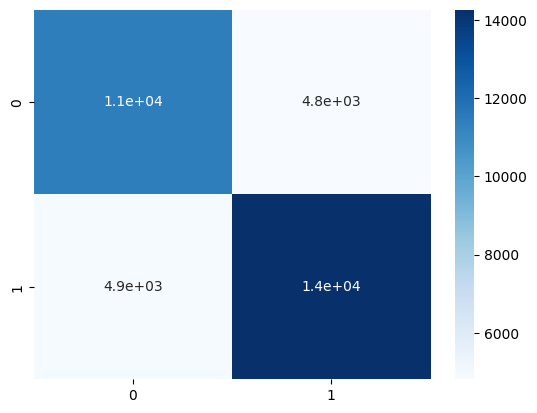

In [ ]:
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)), annot = True, cmap = 'Blues')
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)))

C:\Users\misha\AppData\Local\Temp\ipykernel_9344\2387263145.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


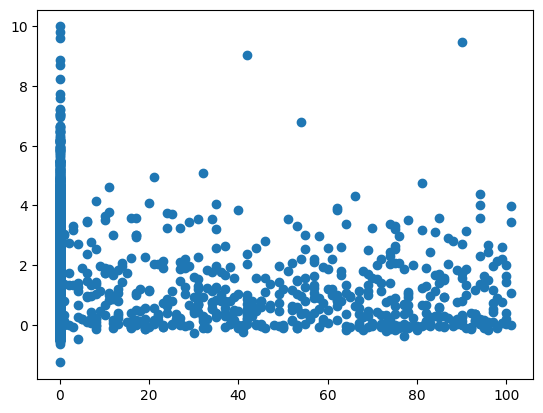

In [ ]:
predictions[1] = np.minimum(predictions[1], 10)
plt.scatter(y_test_start, predictions[1], cmap = 'viridis')

C:\Users\misha\AppData\Local\Temp\ipykernel_9344\1398939558.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


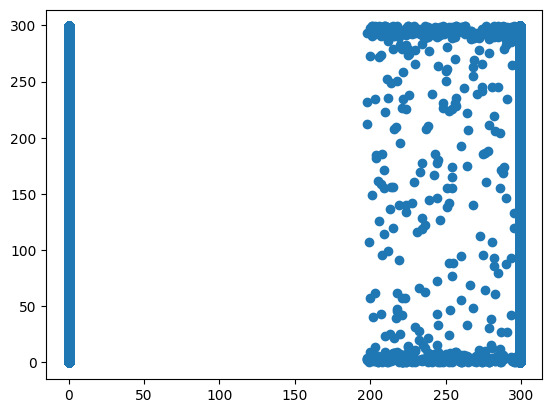

In [ ]:
predictions[2] = np.minimum(predictions[2], 299)
predictions[2] = np.maximum(predictions[2], 0)
plt.scatter(y_test_end, predictions[2], cmap = 'viridis')

In [ ]:
inp_seq1 = Input(shape = (900, 1))
features1 = BatchNormalization()(inp_seq1)
features1 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = Flatten()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, 1))
features2 = BatchNormalization()(inp_seq2)
features2 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = BatchNormalization()(features2)
features2 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = Flatten()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(64, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 900, 1)]     0           []                               
                                                                                                  
 batch_normalization_15 (BatchN  (None, 900, 1)      4           ['input_6[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv1d_10 (Conv1D)             (None, 900, 32)      128         ['batch_normalization_15[0][0]'] 
                                                                                                  
 max_pooling1d_10 (MaxPooling1D  (None, 450, 32)     0           ['conv1d_10[0][0]']        

1106/1106 [==============================] - 12s 8ms/step


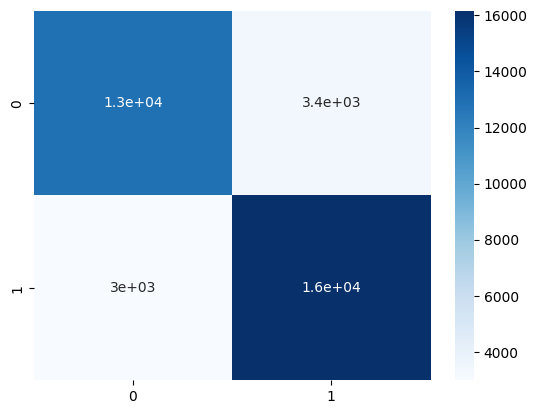

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     16237
           1       0.83      0.84      0.84     19154

    accuracy                           0.82     35391
   macro avg       0.82      0.82      0.82     35391
weighted avg       0.82      0.82      0.82     35391



C:\Users\misha\AppData\Local\Temp\ipykernel_12068\3853430049.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


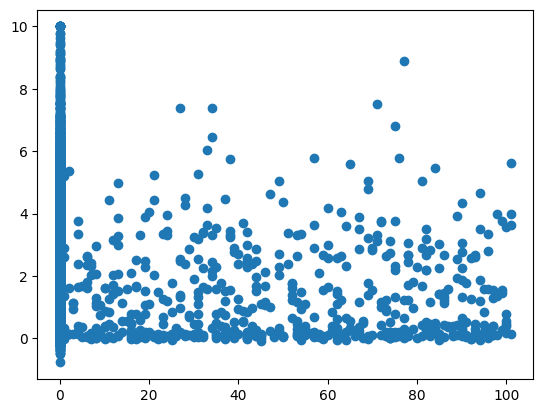

C:\Users\misha\AppData\Local\Temp\ipykernel_12068\3853430049.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


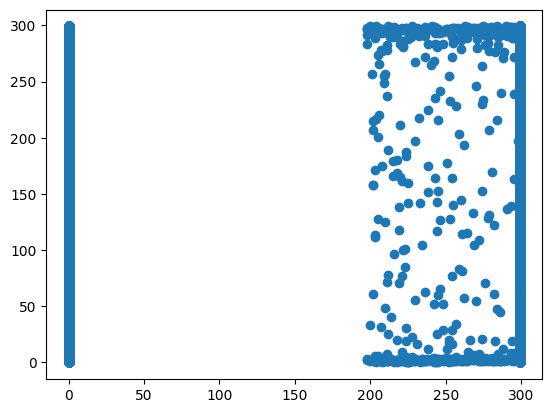

In [ ]:
predictions = model.predict([X_test_seq1, X_test_seq2, X_test])
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)), annot = True, cmap = 'Blues')
plt.show()
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)))

predictions[1] = np.minimum(predictions[1], 10)
plt.scatter(y_test_start, predictions[1], cmap = 'viridis')
plt.show()

predictions[2] = np.minimum(predictions[2], 299)
predictions[2] = np.maximum(predictions[2], 0)
plt.scatter(y_test_end, predictions[2], cmap = 'viridis')
plt.show()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 900, 1)]     0           []                               
                                                                                                  
 batch_normalization_26 (BatchN  (None, 900, 1)      4           ['input_9[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv1d_16 (Conv1D)             (None, 900, 32)      128         ['batch_normalization_26[0][0]'] 
                                                                                                  
 max_pooling1d_16 (MaxPooling1D  (None, 450, 32)     0           ['conv1d_16[0][0]']        

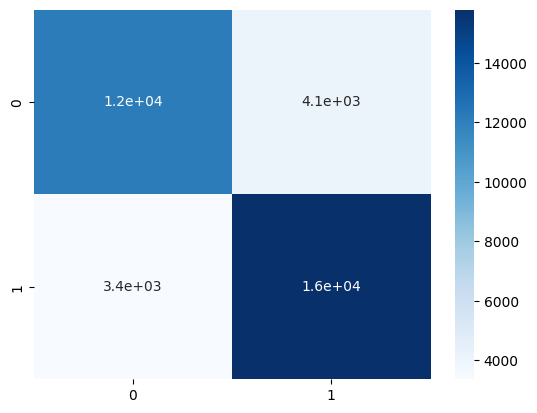

              precision    recall  f1-score   support

           0       0.78      0.75      0.77     16237
           1       0.80      0.82      0.81     19154

    accuracy                           0.79     35391
   macro avg       0.79      0.79      0.79     35391
weighted avg       0.79      0.79      0.79     35391



C:\Users\misha\AppData\Local\Temp\ipykernel_12068\3160610875.py:73: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


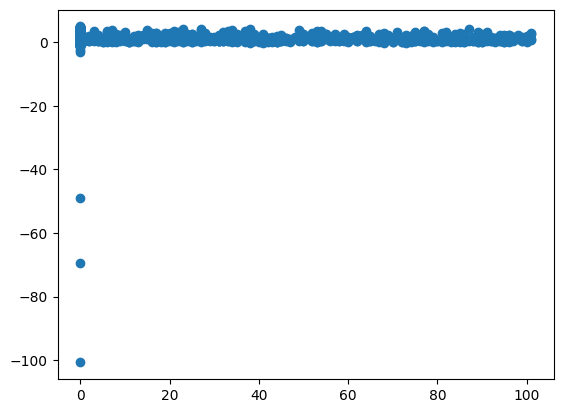

C:\Users\misha\AppData\Local\Temp\ipykernel_12068\3160610875.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


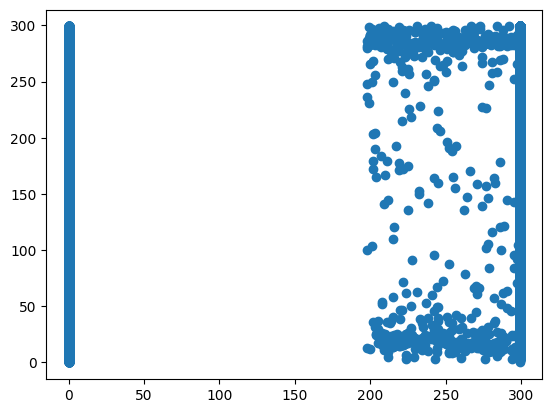

In [ ]:
inp_seq1 = Input(shape = (900, 1))
features1 = BatchNormalization()(inp_seq1)
features1 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(256, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = Flatten()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, 1))
features2 = BatchNormalization()(inp_seq2)
features2 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = BatchNormalization()(features2)
features2 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = BatchNormalization()(features2)
features2 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = Flatten()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(64, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

predictions = model.predict([X_test_seq1, X_test_seq2, X_test])
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)), annot = True, cmap = 'Blues')
plt.show()
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)))

predictions[1] = np.minimum(predictions[1], 10)
plt.scatter(y_test_start, predictions[1], cmap = 'viridis')
plt.show()

predictions[2] = np.minimum(predictions[2], 299)
predictions[2] = np.maximum(predictions[2], 0)
plt.scatter(y_test_end, predictions[2], cmap = 'viridis')
plt.show()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 900, 1)]     0           []                               
                                                                                                  
 batch_normalization_39 (BatchN  (None, 900, 1)      4           ['input_12[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 conv1d_24 (Conv1D)             (None, 900, 32)      128         ['batch_normalization_39[0][0]'] 
                                                                                                  
 max_pooling1d_24 (MaxPooling1D  (None, 450, 32)     0           ['conv1d_24[0][0]']        

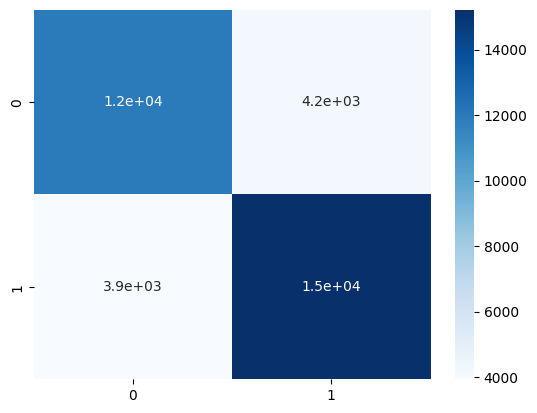

              precision    recall  f1-score   support

           0       0.75      0.74      0.75     16237
           1       0.78      0.79      0.79     19154

    accuracy                           0.77     35391
   macro avg       0.77      0.77      0.77     35391
weighted avg       0.77      0.77      0.77     35391



C:\Users\misha\AppData\Local\Temp\ipykernel_12068\3005801058.py:75: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


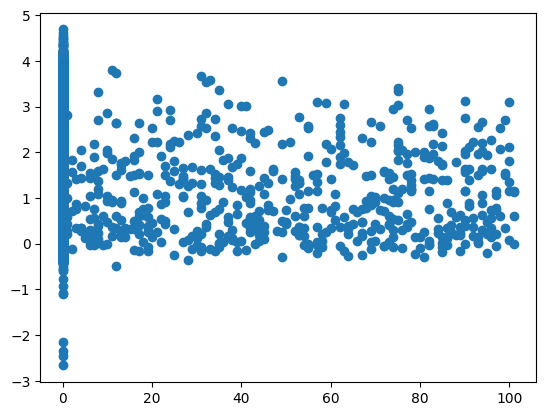

C:\Users\misha\AppData\Local\Temp\ipykernel_12068\3005801058.py:80: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


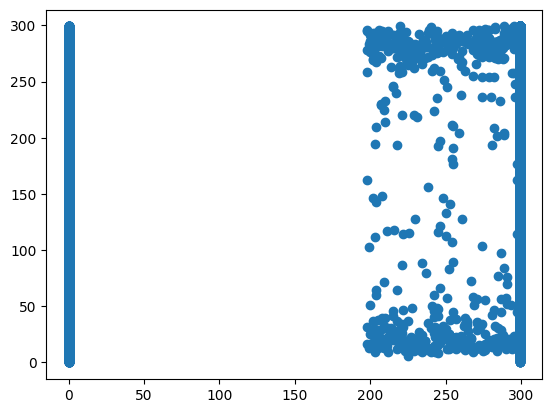

In [ ]:
inp_seq1 = Input(shape = (900, 1))
features1 = BatchNormalization()(inp_seq1)
features1 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(256, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = Flatten()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, 1))
features2 = BatchNormalization()(inp_seq2)
features2 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = BatchNormalization()(features2)
features2 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = BatchNormalization()(features2)
features2 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = Flatten()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

predictions = model.predict([X_test_seq1, X_test_seq2, X_test])
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)), annot = True, cmap = 'Blues')
plt.show()
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)))

predictions[1] = np.minimum(predictions[1], 10)
plt.scatter(y_test_start, predictions[1], cmap = 'viridis')
plt.show()

predictions[2] = np.minimum(predictions[2], 299)
predictions[2] = np.maximum(predictions[2], 0)
plt.scatter(y_test_end, predictions[2], cmap = 'viridis')
plt.show()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 900, 1)]     0           []                               
                                                                                                  
 batch_normalization_30 (BatchN  (None, 900, 1)      4           ['input_10[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 conv1d_8 (Conv1D)              (None, 900, 32)      128         ['batch_normalization_30[0][0]'] 
                                                                                                  
 max_pooling1d_8 (MaxPooling1D)  (None, 450, 32)     0           ['conv1d_8[0][0]']         

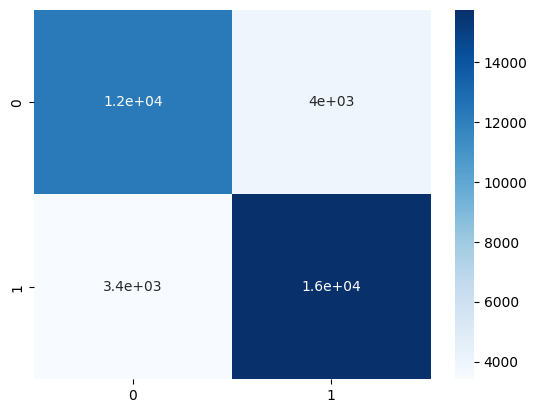

              precision    recall  f1-score   support

           0       0.78      0.75      0.77     16237
           1       0.80      0.82      0.81     19154

    accuracy                           0.79     35391
   macro avg       0.79      0.79      0.79     35391
weighted avg       0.79      0.79      0.79     35391



C:\Users\misha\AppData\Local\Temp\ipykernel_12448\169616608.py:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


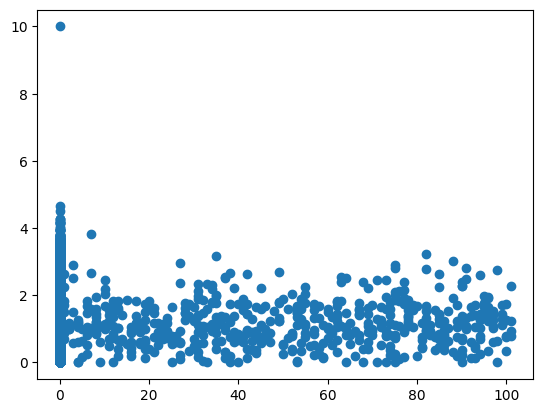

C:\Users\misha\AppData\Local\Temp\ipykernel_12448\169616608.py:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


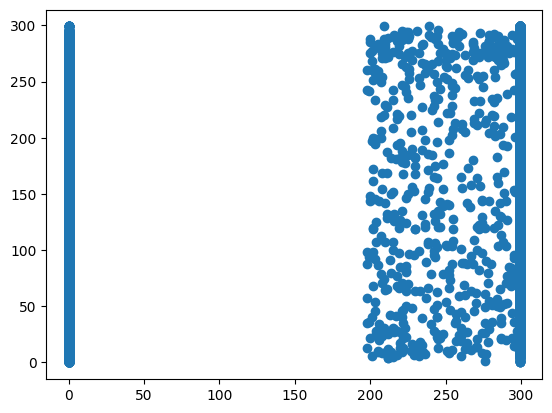

In [ ]:
inp_seq1 = Input(shape = (900, 1))
features1 = BatchNormalization()(inp_seq1)
features1 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Dropout(0.1)(features1)
features1 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Dropout(0.1)(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Dropout(0.1)(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = Dropout(0.1)(features1)
features1 = Flatten()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, 1))
features2 = BatchNormalization()(inp_seq2)
features2 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = BatchNormalization()(features2)
features2 = Dropout(0.1)(features2)
features2 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = Dropout(0.1)(features2)
features2 = Flatten()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dropout(0.1)(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dropout(0.1)(features3)
features3 = Dense(64, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dropout(0.1)(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

predictions = model.predict([X_test_seq1, X_test_seq2, X_test])
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)), annot = True, cmap = 'Blues')
plt.show()
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)))

predictions[1] = np.minimum(predictions[1], 10)
predictions[1] = np.maximum(predictions[1], 0)
plt.scatter(y_test_start, predictions[1], cmap = 'viridis')
plt.show()

predictions[2] = np.minimum(predictions[2], 299)
predictions[2] = np.maximum(predictions[2], 0)
plt.scatter(y_test_end, predictions[2], cmap = 'viridis')
plt.show()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 900, 1)]     0           []                               
                                                                                                  
 batch_normalization_16 (BatchN  (None, 900, 1)      4           ['input_7[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv1d (Conv1D)                (None, 900, 32)      128         ['batch_normalization_16[0][0]'] 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 450, 32)      0           ['conv1d[0][0]']           

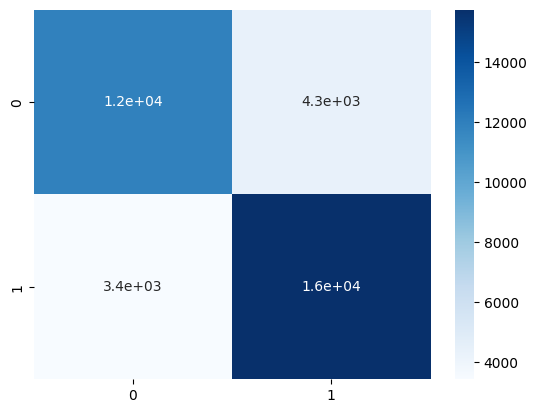

              precision    recall  f1-score   support

           0       0.78      0.73      0.75     16237
           1       0.78      0.82      0.80     19154

    accuracy                           0.78     35391
   macro avg       0.78      0.78      0.78     35391
weighted avg       0.78      0.78      0.78     35391



C:\Users\misha\AppData\Local\Temp\ipykernel_12448\2617375473.py:87: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


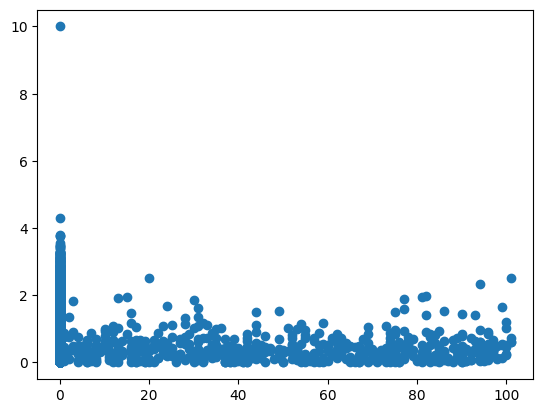

C:\Users\misha\AppData\Local\Temp\ipykernel_12448\2617375473.py:92: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


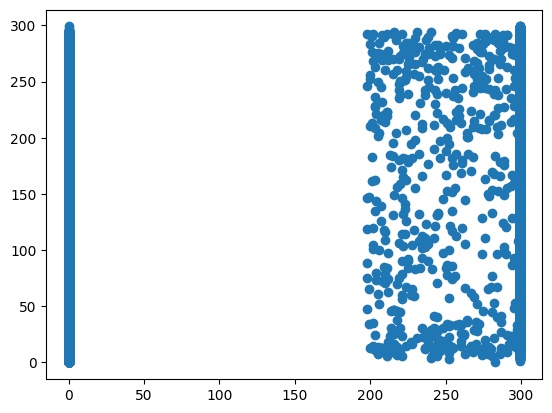

In [ ]:
inp_seq1 = Input(shape = (900, 1))
features1 = BatchNormalization()(inp_seq1)
features1 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Dropout(0.1)(features1)
features1 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Dropout(0.1)(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Dropout(0.1)(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Dropout(0.1)(features1)
features1 = Conv1D(256, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = Dropout(0.1)(features1)
features1 = Flatten()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, 1))
features2 = BatchNormalization()(inp_seq2)
features2 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = BatchNormalization()(features2)
features2 = Dropout(0.1)(features2)
features2 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = BatchNormalization()(features2)
features2 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = Dropout(0.1)(features2)
features2 = Flatten()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dropout(0.1)(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dropout(0.1)(features3)
features3 = Dense(128, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dropout(0.1)(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dropout(0.1)(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

predictions = model.predict([X_test_seq1, X_test_seq2, X_test])
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)), annot = True, cmap = 'Blues')
plt.show()
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)))

predictions[1] = np.minimum(predictions[1], 10)
predictions[1] = np.maximum(predictions[1], 0)
plt.scatter(y_test_start, predictions[1], cmap = 'viridis')
plt.show()

predictions[2] = np.minimum(predictions[2], 299)
predictions[2] = np.maximum(predictions[2], 0)
plt.scatter(y_test_end, predictions[2], cmap = 'viridis')
plt.show()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 20)          80          ['input_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 input_1 (InputLayer)           [(None, 900)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 300)]        0           []                           

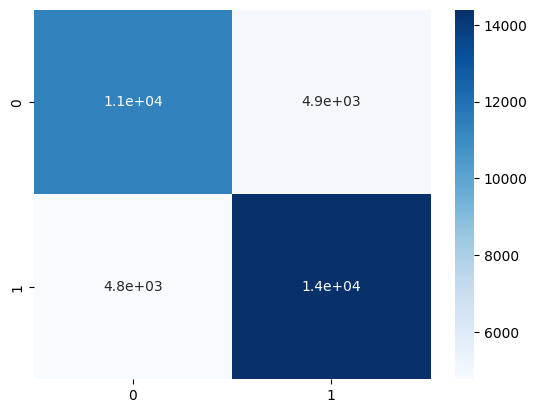

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     16237
           1       0.75      0.75      0.75     19154

    accuracy                           0.73     35391
   macro avg       0.73      0.73      0.73     35391
weighted avg       0.73      0.73      0.73     35391



C:\Users\misha\AppData\Local\Temp\ipykernel_6872\187212542.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


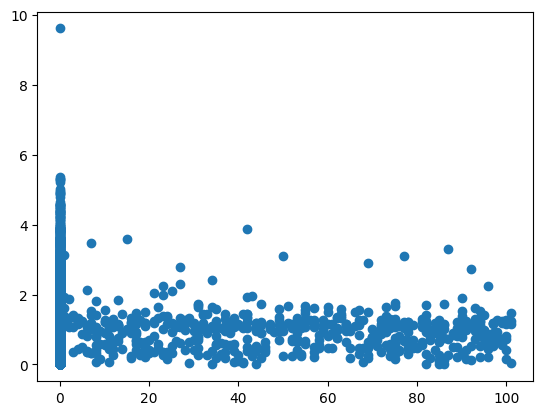

C:\Users\misha\AppData\Local\Temp\ipykernel_6872\187212542.py:61: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


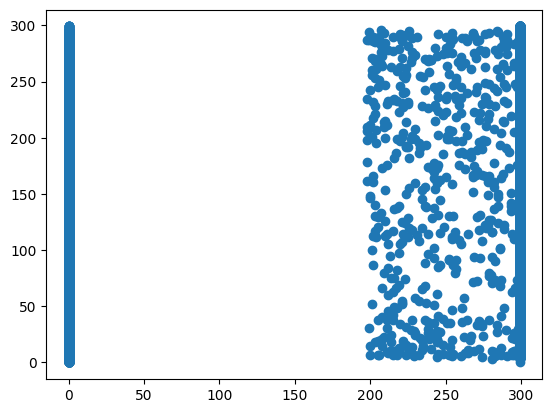

In [ ]:
inp_seq1 = Input(shape = (900, ))
features1 = Embedding(input_dim = len(tokenizer.word_counts), output_dim = 64)(inp_seq1)
features1 = GRU(128)(features1)
features1 = BatchNormalization()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, ))
features2 = Embedding(input_dim = len(tokenizer.word_counts), output_dim = 64)(inp_seq2)
features2 = GRU(64)(features2)
features2 = BatchNormalization()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

predictions = model.predict([X_test_seq1, X_test_seq2, X_test])
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)), annot = True, cmap = 'Blues')
plt.show()
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)))

predictions[1] = np.minimum(predictions[1], 10)
predictions[1] = np.maximum(predictions[1], 0)
plt.scatter(y_test_start, predictions[1], cmap = 'viridis')
plt.show()

predictions[2] = np.minimum(predictions[2], 299)
predictions[2] = np.maximum(predictions[2], 0)
plt.scatter(y_test_end, predictions[2], cmap = 'viridis')
plt.show()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 20)          80          ['input_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 input_1 (InputLayer)           [(None, 900)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 300)]        0           []                           

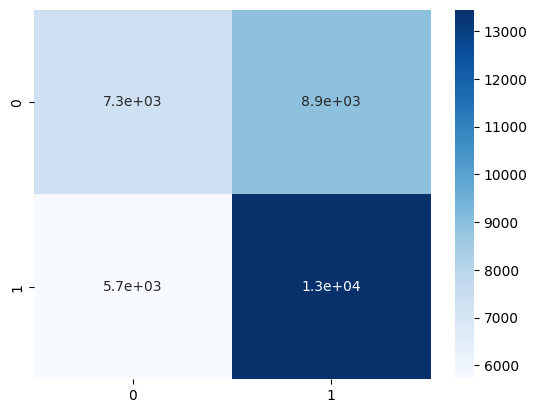

              precision    recall  f1-score   support

           0       0.56      0.45      0.50     16237
           1       0.60      0.70      0.65     19154

    accuracy                           0.59     35391
   macro avg       0.58      0.58      0.57     35391
weighted avg       0.58      0.59      0.58     35391



C:\Users\misha\AppData\Local\Temp\ipykernel_7796\1856034024.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


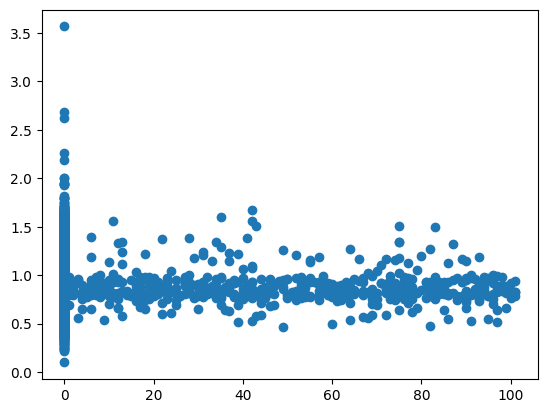

C:\Users\misha\AppData\Local\Temp\ipykernel_7796\1856034024.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


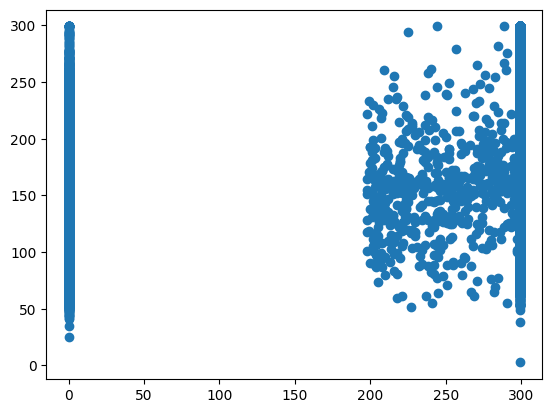

In [ ]:
from keras.layers import LSTM

inp_seq1 = Input(shape = (900, ))
features1 = Embedding(input_dim = len(tokenizer.word_counts), output_dim = 64)(inp_seq1)
features1 = LSTM(64)(features1)
features1 = BatchNormalization()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, ))
features2 = Embedding(input_dim = len(tokenizer.word_counts), output_dim = 64)(inp_seq2)
features2 = LSTM(32)(features2)
features2 = BatchNormalization()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

predictions = model.predict([X_test_seq1, X_test_seq2, X_test])
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)), annot = True, cmap = 'Blues')
plt.show()
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)))

predictions[1] = np.minimum(predictions[1], 100)
predictions[1] = np.maximum(predictions[1], 0)
plt.scatter(y_test_start, predictions[1], cmap = 'viridis')
plt.show()

predictions[2] = np.minimum(predictions[2], 299)
predictions[2] = np.maximum(predictions[2], 0)
plt.scatter(y_test_end, predictions[2], cmap = 'viridis')
plt.show()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 900)]        0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 batch_normalization_10 (BatchN  (None, 20)          80          ['input_6[0][0]']                
 ormalization)                                                                              

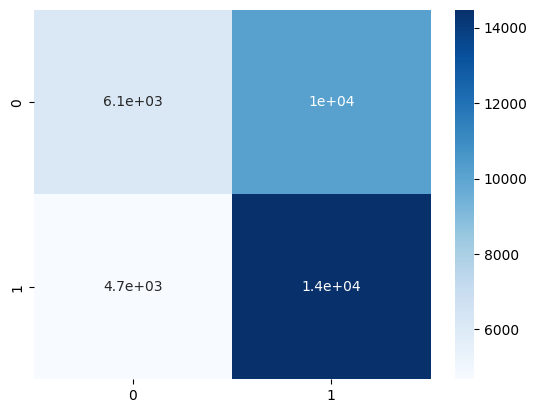

              precision    recall  f1-score   support

           0       0.57      0.38      0.45     16237
           1       0.59      0.76      0.66     19154

    accuracy                           0.58     35391
   macro avg       0.58      0.57      0.56     35391
weighted avg       0.58      0.58      0.57     35391



C:\Users\misha\AppData\Local\Temp\ipykernel_12448\2041127522.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


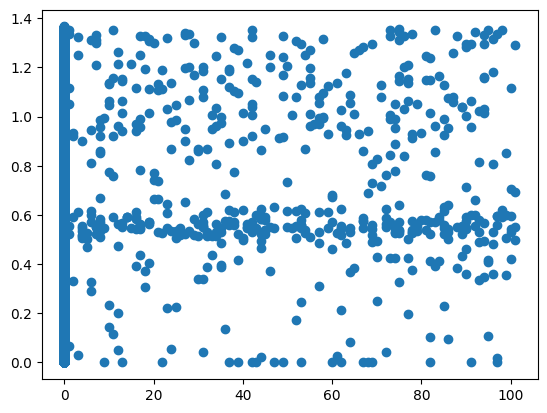

C:\Users\misha\AppData\Local\Temp\ipykernel_12448\2041127522.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


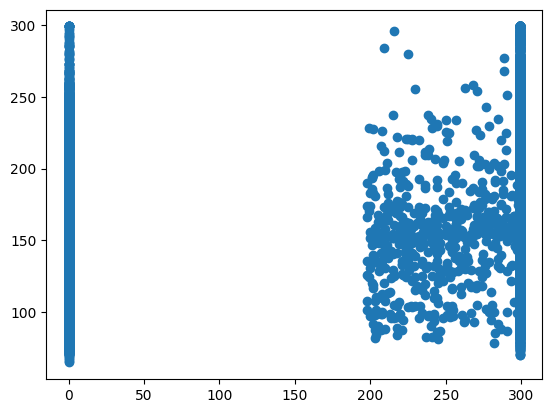

In [ ]:
inp_seq1 = Input(shape = (900, ))
features1 = Embedding(input_dim = len(tokenizer.word_counts), output_dim = 32)(inp_seq1)
features1 = LSTM(64, return_sequences = True)(features1)
features1 = BatchNormalization()(features1)
features1 = LSTM(64)(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, ))
features2 = Embedding(input_dim = len(tokenizer.word_counts), output_dim = 32)(inp_seq2)
features2 = LSTM(32, return_sequences = True)(features2)
features2 = BatchNormalization()(features2)
features2 = LSTM(32)(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

predictions = model.predict([X_test_seq1, X_test_seq2, X_test])
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)), annot = True, cmap = 'Blues')
plt.show()
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)))

predictions[1] = np.minimum(predictions[1], 10)
predictions[1] = np.maximum(predictions[1], 0)
plt.scatter(y_test_start, predictions[1], cmap = 'viridis')
plt.show()

predictions[2] = np.minimum(predictions[2], 299)
predictions[2] = np.maximum(predictions[2], 0)
plt.scatter(y_test_end, predictions[2], cmap = 'viridis')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['label', 'n_start', 'n_end'], axis = 1),
                                                     df[['label', 'n_start', 'n_end']], train_size = 0.8, random_state = 1212)

X_train_seq1 = X_train['seq_overlap']
X_train_seq2 = X_train['seq_med']
X_train = X_train.drop(['seq_overlap', 'seq_med'], axis = 1)

X_test_seq1 = X_test['seq_overlap']
X_test_seq2 = X_test['seq_med']
X_test = X_test.drop(['seq_overlap', 'seq_med'], axis = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components = 20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level = True)
tokenizer.fit_on_texts(X_test_seq1)
X_train_seq1 = np.array(tokenizer.texts_to_sequences(X_train_seq1))
X_train_seq2 = np.array(tokenizer.texts_to_sequences(X_train_seq2))
X_test_seq1 = np.array(tokenizer.texts_to_sequences(X_test_seq1))
X_test_seq2 = np.array(tokenizer.texts_to_sequences(X_test_seq2))

start_scaler = MinMaxScaler()
end_scaler = MinMaxScaler()
y_train_start = start_scaler.fit_transform(y_train['n_start'].values.reshape(-1, 1))
y_train_end = end_scaler.fit_transform(y_train['n_end'].values.reshape(-1, 1))
y_test_start = start_scaler.transform(y_test['n_start'].values.reshape(-1, 1))
y_test_end = end_scaler.transform(y_test['n_end'].values.reshape(-1, 1))

y_train = tf.keras.utils.to_categorical(y_train['label'])
y_test = tf.keras.utils.to_categorical(y_test['label'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 900, 1)]     0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 900, 1)      4           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv1d (Conv1D)                (None, 900, 32)      128         ['batch_normalization[0][0]']    
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 450, 32)      0           ['conv1d[0][0]']             

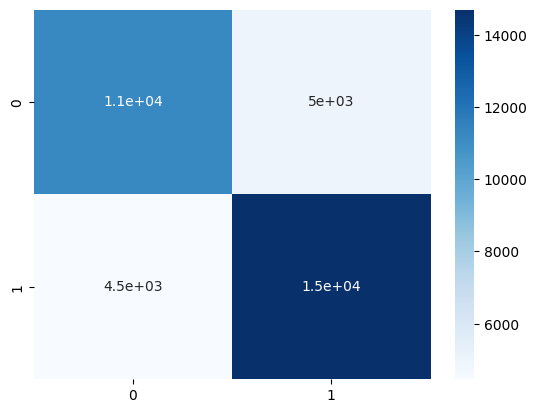

              precision    recall  f1-score   support

           0       0.72      0.69      0.70     16237
           1       0.75      0.77      0.76     19154

    accuracy                           0.73     35391
   macro avg       0.73      0.73      0.73     35391
weighted avg       0.73      0.73      0.73     35391



C:\Users\misha\AppData\Local\Temp\ipykernel_19644\1470457382.py:67: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


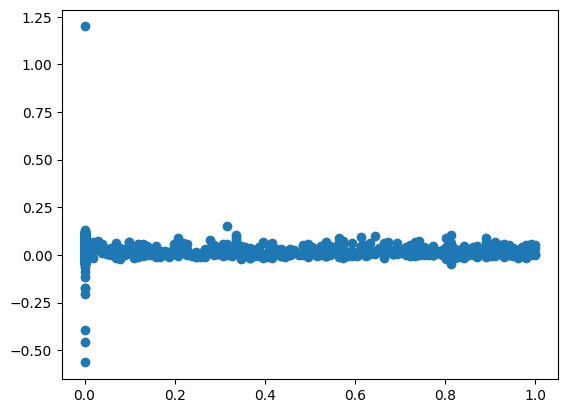

C:\Users\misha\AppData\Local\Temp\ipykernel_19644\1470457382.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


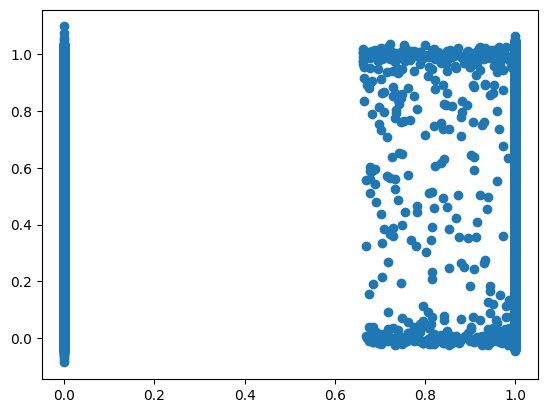

In [ ]:
inp_seq1 = Input(shape = (900, 1))
features1 = BatchNormalization()(inp_seq1)
features1 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = BatchNormalization()(features1)
features1 = Conv1D(128, 3, padding = 'same', activation = 'elu')(features1)
features1 = MaxPooling1D(2)(features1)
features1 = Flatten()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, 1))
features2 = BatchNormalization()(inp_seq2)
features2 = Conv1D(32, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = BatchNormalization()(features2)
features2 = Conv1D(64, 3, padding = 'same', activation = 'elu')(features2)
features2 = MaxPooling1D(2)(features2)
features2 = Flatten()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(64, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

predictions = model.predict([X_test_seq1, X_test_seq2, X_test])
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)), annot = True, cmap = 'Blues')
plt.show()

print(classification_report(np.argmax(y_test, axis = 1), np.argmax(predictions[0], axis = 1)))

plt.scatter(y_test_start, predictions[1], cmap = 'viridis')
plt.show()

plt.scatter(y_test_end, predictions[2], cmap = 'viridis')
plt.show()


In [ ]:
class PGAM():
    def __init__(self, X_seq_train, X_seq_test, X_seq_overlap_train, X_seq_overlap_test,
                  y_classification_train, y_classification_test, y_start_train, y_start_test,
                  y_end_train, y_end_test, X_features_train, X_features_test,
                  n_conv_1_layers = 1, n_conv_2_layers = 1, n_conv_1_neurons = 16,
                  n_conv_2_neurons = 16, n_dense_layers = 1, n_dense_neurons = 16,
                  n_concat_layers = 1, n_concat_neurons = 16, n_components = 20,
                  n_out_conv_1 = 16, n_out_conv_2 = 16, n_out_dense = 16):
        self.X_seq_train = X_seq_train
        self.X_seq_test = X_seq_test
        self.X_seq_overlap_train = X_seq_overlap_train
        self.X_seq_overlap_test = X_seq_overlap_test
        self.y_classification_train = y_classification_train
        self.y_classification_test = y_classification_test
        self.y_start_train = y_start_train
        self.y_start_test = y_start_test
        self.y_end_train = y_end_train
        self.y_end_test = y_end_test
        self.X_features_train = X_features_train
        self.X_features_test = X_features_test

        self.n_conv_1_layers = n_conv_1_layers
        self.n_conv_2_layers = n_conv_2_layers
        self.n_conv_1_neurons = n_conv_1_neurons
        self.n_conv_2_neurons = n_conv_2_neurons
        self.n_dense_layers = n_dense_layers
        self.n_dense_neurons = n_dense_neurons
        self.n_concat_layers = n_concat_layers
        self.n_concat_neurons = n_concat_neurons
        self.n_components = n_components
        self.n_out_conv_1 = n_out_conv_1
        self.n_out_conv_2 = n_out_conv_2
        self.n_out_dense = n_out_dense

    
    def get_params(self, deep = True):
        return {
            'X_seq_train' : self.X_seq_train,
            'X_seq_test': self.X_seq_test,
            'X_seq_overlap_train' : self.X_seq_overlap_train,
            'X_seq_overlap_test' : self.X_seq_overlap_test,
            'y_classification_train' : self.y_classification_train,
            'y_classification_test' : self.y_classification_test,
            'y_start_train' : self.y_start_train,
            'y_start_test' : self.y_start_test,
            'y_end_train' : self.y_end_train,
            'y_end_test' : self.y_end_test,
            'X_features_train' : self.X_features_train,
            'X_features_test': self.X_features_test,
            'n_conv_1_layers': self.n_conv_1_layers,
            'n_conv_2_layers': self.n_conv_2_layers,
            'n_conv_1_neurons' : self.n_conv_1_neurons,
            'n_conv_2_neurons' : self.n_conv_2_neurons,
            'n_dense_layers' : self.n_dense_layers,
            'n_dense_neurons' : self.n_dense_neurons,
            'n_concat_layers' : self.n_concat_layers,
            'n_concat_neurons' : self.n_concat_neurons,
            'n_components' : self.n_components,
            'n_out_conv_1' : self.n_out_conv_1,
            'n_out_conv_2' : self.n_out_conv_2,
            'n_out_dense' : self.n_out_dense
        }
    
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

    
    def create_model(self): 
        print(f"""'n_conv_1_layers': {self.n_conv_1_layers},
            'n_conv_2_layers':{ self.n_conv_2_layers},
            'n_conv_1_neurons' : {self.n_conv_1_neurons},
            'n_conv_2_neurons' : {self.n_conv_2_neurons},
            'n_dense_layers' : {self.n_dense_layers},
            'n_dense_neurons' : {self.n_dense_neurons},
            'n_concat_layers' : {self.n_concat_layers},
            'n_concat_neurons' : {self.n_concat_neurons},
            'n_components' : {self.n_components},
            'n_out_conv_1' : {self.n_out_conv_1},
            'n_out_conv_2' : {self.n_out_conv_2},
            'n_out_dense' : {self.n_out_dense}
              """)

        inp_seq1 = Input(shape = (900, 1))
        features1 = BatchNormalization()(inp_seq1)
        features1 = Conv1D(self.n_conv_1_neurons, 3, padding = 'same', activation = 'elu')(features1)
        features1 = MaxPooling1D(2)(features1)
        features1 = BatchNormalization()(features1)
        for i in range(self.n_conv_1_layers - 1):
            features1 = Conv1D(self.n_conv_1_neurons * 2 ** (i + 2), 3, padding = 'same', activation = 'elu')(features1)
            features1 = MaxPooling1D(2)(features1)
            features1 = BatchNormalization()(features1)

        features1 = Flatten()(features1)
        features1 = Dense(self.n_out_conv_1, activation = 'elu')(features1)

        inp_seq2 = Input(shape = (300, 1))
        features2 = BatchNormalization()(inp_seq2)
        features2 = Conv1D(self.n_conv_2_neurons, 3, padding = 'same', activation = 'elu')(features2)
        features2 = MaxPooling1D(2)(features2)
        features2 = BatchNormalization()(features2)
        for i in range(self.n_conv_2_layers - 1):
            features2 = Conv1D(self.n_conv_2_neurons * 2 ** (i + 2), 3, padding = 'same', activation = 'elu')(features2)
            features2 = MaxPooling1D(2)(features2)
            features2 = BatchNormalization()(features2)

        features2 = Flatten()(features2)
        features2 = Dense(self.n_out_conv_2, activation = 'elu')(features2)

        inp_feature3 = Input(shape = (self.n_components, ))
        features3 = BatchNormalization()(inp_feature3)
        features3 = Dense(self.n_dense_neurons, activation = 'elu')(features3)
        features3 = BatchNormalization()(features3)
        for i in range(self.n_dense_layers - 1):
            features3 = Dense(self.n_dense_neurons // (2 ** (i + 2)), activation = 'elu')(features3)
            features3 = BatchNormalization()(features3)

        features3 = Dense(self.n_out_dense, activation = 'elu')(features3)

        concat = concatenate([features1, features2, features3])
        concat = Dense(self.n_concat_neurons, activation = 'elu')(concat)
        concat = BatchNormalization()(concat)
        for i in range(self.n_concat_layers - 2):
            concat = Dense(self.n_concat_neurons // (2 ** (i + 2)), activation = 'elu')(concat)
            concat = BatchNormalization()(concat)

        out_start = Dense(128, activation = 'elu')(concat)
        out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

        out_end = Dense(128, activation = 'elu')(concat)
        out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

        out_classification = Dense(128, activation = 'elu')(concat)
        out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

        self.model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
        optimizer = Nadam(learning_rate = 0.01)
        self.model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
                    metrics = ['accuracy'])


    def fit(self, X, y):
        self.pca = PCA(n_components = self.n_components)
        self.X_features_train = self.pca.fit_transform(self.X_features_train)
        self.X_features_test = self.pca.transform(self.X_features_test)

        self.create_model()
        self.hist = self.model.fit([self.X_seq_overlap_train, self.X_seq_train, self.X_features_train],
                               [self.y_classification_train, self.y_start_train, self.y_end_train],
                                batch_size = 256, epochs = 50, 
                                validation_data = [[self.X_seq_overlap_test, self.X_seq_test, self.X_features_test],
                                                   [self.y_classification_test, self.y_start_test, self.y_end_test]],
                 callbacks = [earlystopping, reducelr], verbose = True)

        predicted_values = self.model.predict([self.X_seq_overlap_train, self.X_seq_train, self.X_features_train])
        return f1_score(np.argmax(self.y_classification_train, axis = 1), np.argmax(predicted_values[0], axis = 1))


    def score(self, X, y):
        predicted_values = self.model.predict([self.X_seq_overlap_test, self.X_seq_test, self.X_features_test])
        print(f1_score(np.argmax(self.y_classification_test, axis = 1), np.argmax(predicted_values[0], axis = 1)))
        print("\n")
        return f1_score(np.argmax(self.y_classification_test, axis = 1), np.argmax(predicted_values[0], axis = 1))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['label', 'n_start', 'n_end'], axis = 1),
                                                     df[['label', 'n_start', 'n_end']], train_size = 0.8, random_state = 1212)

X_train_seq1 = X_train['seq_overlap']
X_train_seq2 = X_train['seq_med']
X_train = X_train.drop(['seq_overlap', 'seq_med'], axis = 1)

X_test_seq1 = X_test['seq_overlap']
X_test_seq2 = X_test['seq_med']
X_test = X_test.drop(['seq_overlap', 'seq_med'], axis = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level = True)
tokenizer.fit_on_texts(X_test_seq1)
X_train_seq1 = np.array(tokenizer.texts_to_sequences(X_train_seq1))
X_train_seq2 = np.array(tokenizer.texts_to_sequences(X_train_seq2))
X_test_seq1 = np.array(tokenizer.texts_to_sequences(X_test_seq1))
X_test_seq2 = np.array(tokenizer.texts_to_sequences(X_test_seq2))

start_scaler = MinMaxScaler()
end_scaler = MinMaxScaler()
y_train_start = start_scaler.fit_transform(y_train['n_start'].values.reshape(-1, 1))
y_train_end = end_scaler.fit_transform(y_train['n_end'].values.reshape(-1, 1))
y_test_start = start_scaler.transform(y_test['n_start'].values.reshape(-1, 1))
y_test_end = end_scaler.transform(y_test['n_end'].values.reshape(-1, 1))

y_train = tf.keras.utils.to_categorical(y_train['label'])
y_test = tf.keras.utils.to_categorical(y_test['label'])

param_dist = {
    'n_conv_1_layers': np.array([3, 4, 5]),
    'n_conv_2_layers': np.array([2, 3, 4]),
    'n_conv_1_neurons' : np.array([16, 32, 64]),
    'n_conv_2_neurons' : np.array([16, 32, 64]),
    'n_dense_layers' : np.array([2, 3, 4]),
    'n_dense_neurons' : np.array([1024, 512, 256]),
    'n_concat_layers' : np.array([2, 3, 4]),
    'n_concat_neurons' : np.array([1024, 512, 256]),
    'n_components' : np.array([20, 25, 30]),
    'n_out_conv_1' : np.array([128, 256, 512]),
    'n_out_conv_2' : np.array([128, 256, 512]),
    'n_out_dense' : np.array([128, 256, 512])
}

In [ ]:
test_model = PGAM(X_train_seq2, X_test_seq2, X_train_seq1, X_test_seq1,
                y_train, y_test, y_train_start, y_test_start, y_train_end, y_test_end,
                X_train, X_test)

random_search = RandomizedSearchCV(test_model, param_distributions = param_dist, n_iter = 20, cv = 2, random_state = 1212)

random_search.fit(np.zeros((10, 10)), np.zeros(10))

best_params = random_search.best_params_
print("Best Parameters:", best_params, '\n\n\n\n\n')

cv_results = random_search.cv_results_
for i in range(len(cv_results['params'])):
    print(f"Iteration {i + 1} - Parameters: {cv_results['params'][i]}, Mean Test Score: {cv_results['mean_test_score'][i]}\n")

'n_conv_1_layers': 4,
            'n_conv_2_layers':4,
            'n_conv_1_neurons' : 16,
            'n_conv_2_neurons' : 16,
            'n_dense_layers' : 2,
            'n_dense_neurons' : 512,
            'n_concat_layers' : 4,
            'n_concat_neurons' : 256,
            'n_components' : 20,
            'n_out_conv_1' : 512,
            'n_out_conv_2' : 128,
            'n_out_dense' : 512
              
Epoch 1/50
553/553 [==============================] - 104s 141ms/step - loss: 0.9819 - out_classification_loss: 0.6796 - out_start_loss: 0.0274 - out_end_loss: 0.2749 - out_classification_accuracy: 0.5700 - out_start_accuracy: 0.9768 - out_end_accuracy: 0.5473 - val_loss: 0.9310 - val_out_classification_loss: 0.6786 - val_out_start_loss: 0.0088 - val_out_end_loss: 0.2435 - val_out_classification_accuracy: 0.5734 - val_out_start_accuracy: 0.9841 - val_out_end_accuracy: 0.5525 - lr: 0.0100
Epoch 2/50
553/553 [==============================] - 75s 136ms/step - loss: 0.9052 - 

In [ ]:
model = PGAM(X_train_seq2, X_test_seq2, X_train_seq1, X_test_seq1,
                y_train, y_test, y_train_start, y_test_start, y_train_end, y_test_end,
                X_train, X_test, 4, 3, 32, 16, 3, 512, 4, 256, 20, 128, 256, 256)
model.fit(np.zeros((10, 10)), np.zeros(10))

history = model.hist

'n_conv_1_layers': 4,
            'n_conv_2_layers':3,
            'n_conv_1_neurons' : 32,
            'n_conv_2_neurons' : 16,
            'n_dense_layers' : 3,
            'n_dense_neurons' : 512,
            'n_concat_layers' : 4,
            'n_concat_neurons' : 256,
            'n_components' : 20,
            'n_out_conv_1' : 128,
            'n_out_conv_2' : 256,
            'n_out_dense' : 256
              
Epoch 1/50
553/553 [==============================] - 115s 182ms/step - loss: 0.9574 - out_classification_loss: 0.6728 - out_start_loss: 0.0224 - out_end_loss: 0.2622 - out_classification_accuracy: 0.5777 - out_start_accuracy: 0.9800 - out_end_accuracy: 0.5535 - val_loss: 0.9024 - val_out_classification_loss: 0.6629 - val_out_start_loss: 0.0062 - val_out_end_loss: 0.2334 - val_out_classification_accuracy: 0.5892 - val_out_start_accuracy: 0.9841 - val_out_end_accuracy: 0.5812 - lr: 0.0100
Epoch 2/50
553/553 [==============================] - 97s 175ms/step - loss: 0.8886 - 

In [ ]:
def evaluate_model(y_true, predictions, y_test_start, y_test_end):
    y_true = np.argmax(y_true, axis = 1)
    # Get accuracy, precision, recall, f1-score
    print("Classification Report:")
    print(classification_report(y_true, np.argmax(predictions[0], axis = 1)))

    # Get confusion matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, np.argmax(predictions[0], axis = 1))
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', 
                xticklabels = ['Non-Transcribe ', 'Transcribe'], 
                yticklabels = ['Non-Transcribe ', 'Transcribe'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC Curve
    y_pred = predictions[0]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred[:, 1])
    plt.plot(fpr, tpr)
    plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), c = 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # Plot Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred[:, 1])
    plt.plot(recall, precision)
    plt.plot([0, 1], [1, 0], c = 'r')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred[:, 1]))
    print("Kappa:", cohen_kappa_score(y_true, np.argmax(y_pred, axis = 1)))
    print("MCC:", matthews_corrcoef(y_true, np.argmax(y_pred, axis = 1)))

    plt.scatter(y_test_start, predictions[1], cmap = 'viridis')
    plt.show()

    plt.scatter(y_test_end, predictions[2], cmap = 'viridis')
    plt.show()


1106/1106 [==============================] - 12s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     16237
           1       0.85      0.86      0.86     19154

    accuracy                           0.84     35391
   macro avg       0.84      0.84      0.84     35391
weighted avg       0.84      0.84      0.84     35391

Confusion Matrix:


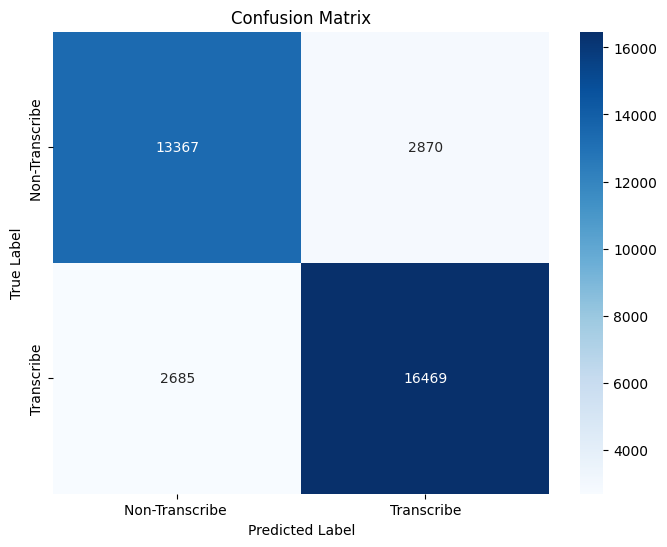

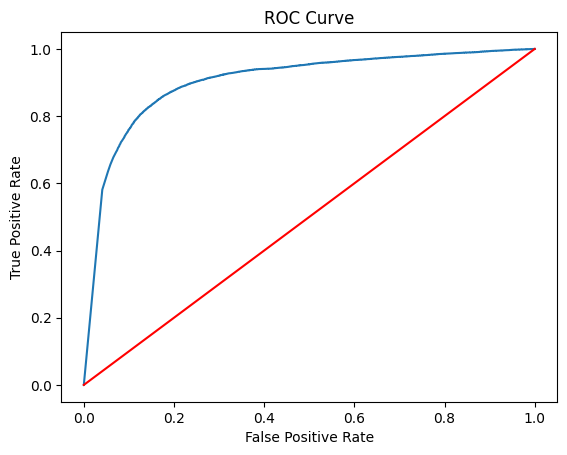

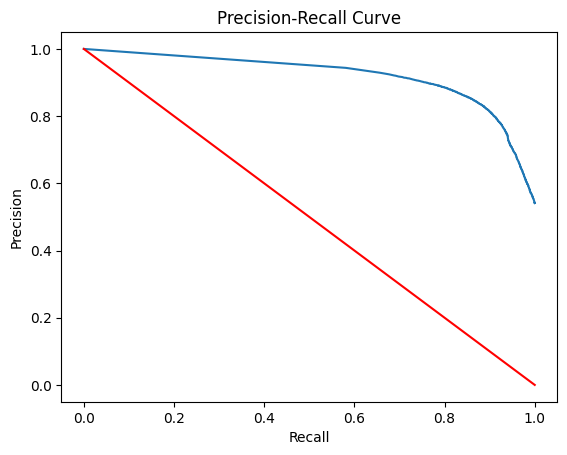

ROC-AUC Score: 0.9032516460634794
Kappa: 0.6836567445037028
MCC: 0.6836946879479657


C:\Users\misha\AppData\Local\Temp\ipykernel_17392\3200611257.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


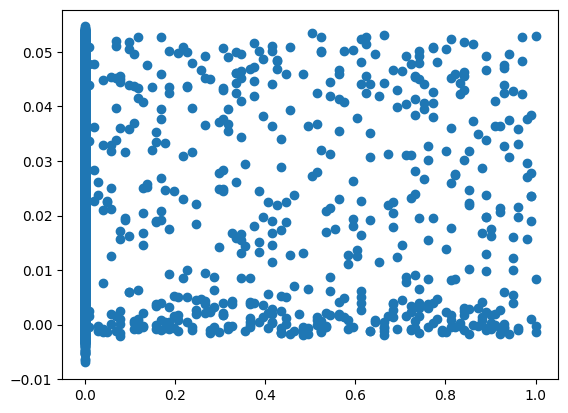

C:\Users\misha\AppData\Local\Temp\ipykernel_17392\3200611257.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


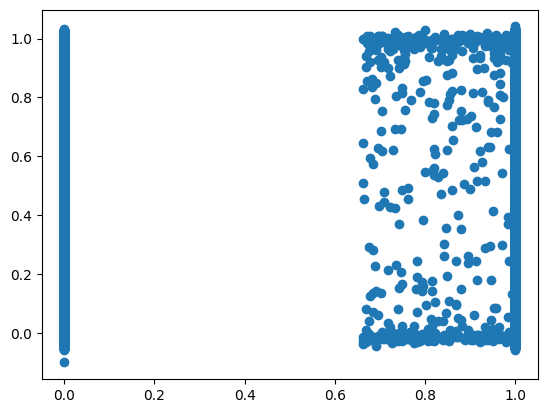

In [ ]:
predictions_conv = model.model.predict([model.X_seq_overlap_test, model.X_seq_test, model.X_features_test])
evaluate_model(model.y_classification_test, predictions_conv, y_test_start, y_test_end)

In [ ]:
pca = PCA(n_components = 20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
inp_seq1 = Input(shape = (900, ))
features1 = Embedding(input_dim = len(tokenizer.word_counts), output_dim = 64)(inp_seq1)
features1 = GRU(128)(features1)
features1 = BatchNormalization()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, ))
features2 = Embedding(input_dim = len(tokenizer.word_counts), output_dim = 64)(inp_seq2)
features2 = GRU(64)(features2)
features2 = BatchNormalization()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 batch_normalization_34 (BatchN  (None, 20)          80          ['input_9[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 input_7 (InputLayer)           [(None, 900)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 300)]        0           []                         

1106/1106 [==============================] - 27s 23ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.47      0.52     16237
           1       0.62      0.72      0.66     19154

    accuracy                           0.61     35391
   macro avg       0.60      0.60      0.59     35391
weighted avg       0.60      0.61      0.60     35391

Confusion Matrix:


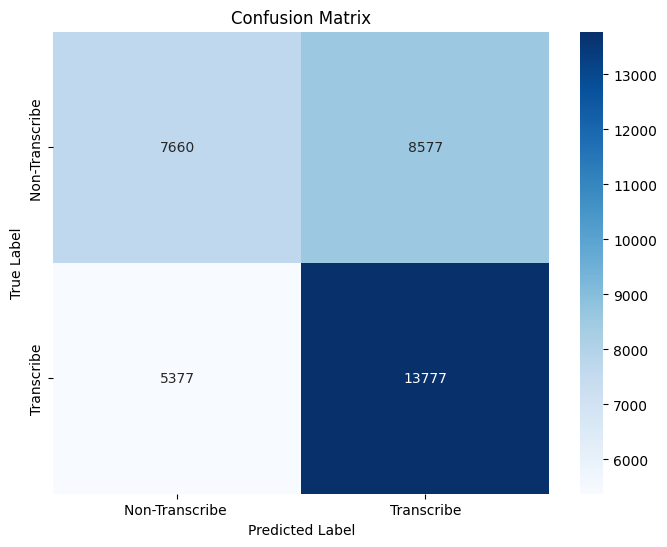

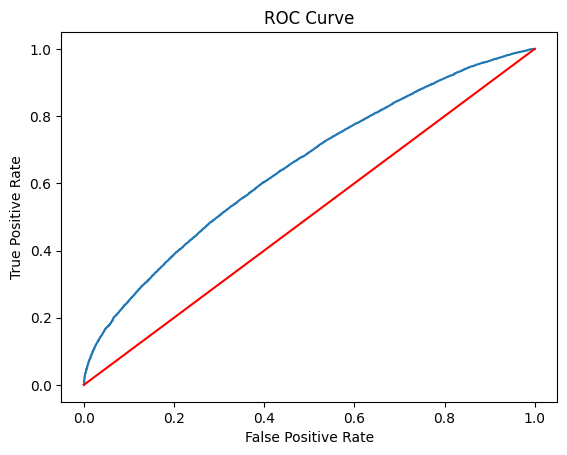

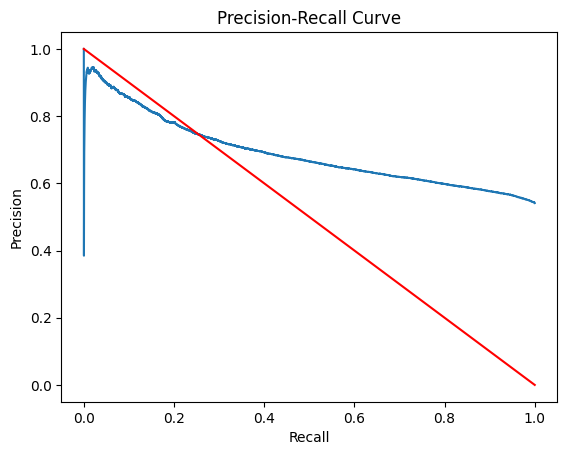

ROC-AUC Score: 0.6484011298805391
Kappa: 0.19394793038858238
MCC: 0.19734881200535312


C:\Users\misha\AppData\Local\Temp\ipykernel_17392\3200611257.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


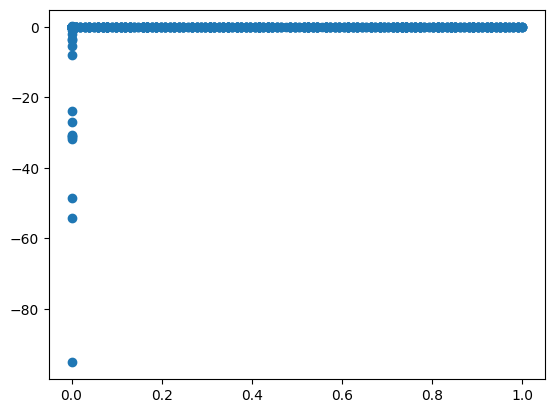

C:\Users\misha\AppData\Local\Temp\ipykernel_17392\3200611257.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


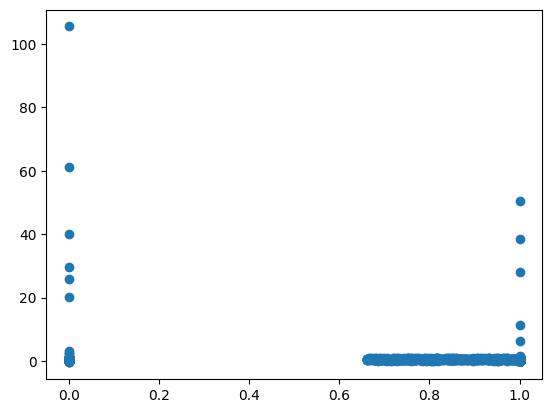

In [ ]:
predictions_GRU = model.predict([X_test_seq1, X_test_seq2, X_test])
evaluate_model(y_test, predictions_GRU, y_test_start, y_test_end)

In [ ]:
inp_seq1 = Input(shape = (900, ))
features1 = Embedding(input_dim = len(tokenizer.word_counts), output_dim = 64)(inp_seq1)
features1 = LSTM(128)(features1)
features1 = BatchNormalization()(features1)
features1 = Dense(256, activation = 'elu')(features1)

inp_seq2 = Input(shape = (300, ))
features2 = Embedding(input_dim = len(tokenizer.word_counts), output_dim = 64)(inp_seq2)
features2 = LSTM(64)(features2)
features2 = BatchNormalization()(features2)
features2 = Dense(256, activation = 'elu')(features2)

inp_feature3 = Input(shape = (X_train.shape[1], ))
features3 = BatchNormalization()(inp_feature3)
features3 = Dense(256, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)
features3 = BatchNormalization()(features3)
features3 = Dense(128, activation = 'elu')(features3)

concat = concatenate([features1, features2, features3])
concat = Dense(512, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)
concat = Dense(256, activation = 'elu')(concat)
concat = BatchNormalization()(concat)

out_start = Dense(128, activation = 'elu')(concat)
out_start = Dense(1, activation = 'linear', name = 'out_start')(out_start)

out_end = Dense(128, activation = 'elu')(concat)
out_end = Dense(1, activation = 'linear', name = 'out_end')(out_end)

out_classification = Dense(128, activation = 'elu')(concat)
out_classification = Dense(2, activation = 'softmax', name = 'out_classification')(out_classification)

model = Model(inputs = [inp_seq1, inp_seq2, inp_feature3], outputs = [out_classification, out_start, out_end])
optimizer = Nadam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss = ['binary_crossentropy', 'mean_squared_error', 'mean_squared_error'],
               metrics = ['accuracy'])

model.summary()

hist = model.fit([X_train_seq1, X_train_seq2, X_train], [y_train, y_train_start, y_train_end], batch_size = 256, epochs = 50, 
                 validation_data = [[X_test_seq1, X_test_seq2, X_test], [y_test, y_test_start, y_test_end]],
                 callbacks = [earlystopping, reducelr])

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 20)]         0           []                               
                                                                                                  
 batch_normalization_42 (BatchN  (None, 20)          80          ['input_12[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 input_10 (InputLayer)          [(None, 900)]        0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 300)]        0           []                         

1106/1106 [==============================] - 40s 35ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.44      0.49     16237
           1       0.60      0.71      0.65     19154

    accuracy                           0.59     35391
   macro avg       0.58      0.57      0.57     35391
weighted avg       0.58      0.59      0.58     35391

Confusion Matrix:


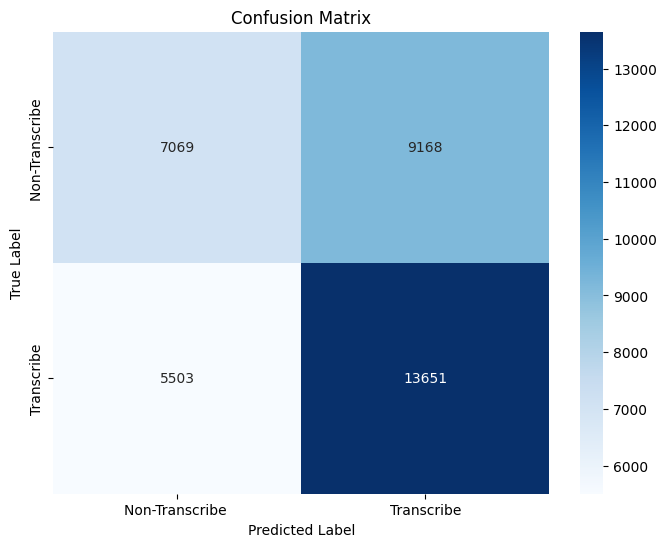

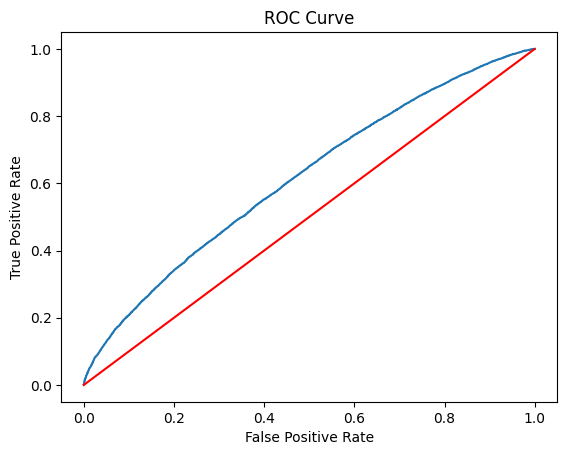

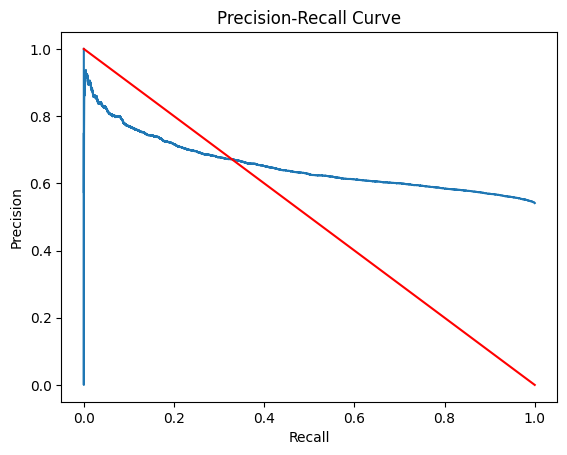

ROC-AUC Score: 0.6151161698509255
Kappa: 0.1506500749625982
MCC: 0.1541601512176936


C:\Users\misha\AppData\Local\Temp\ipykernel_17392\3200611257.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_start, predictions[1], cmap = 'viridis')


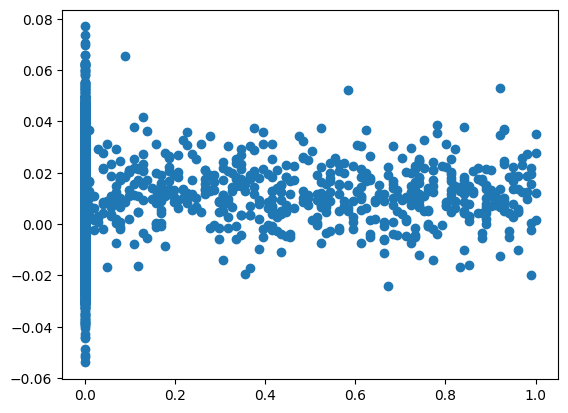

C:\Users\misha\AppData\Local\Temp\ipykernel_17392\3200611257.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test_end, predictions[2], cmap = 'viridis')


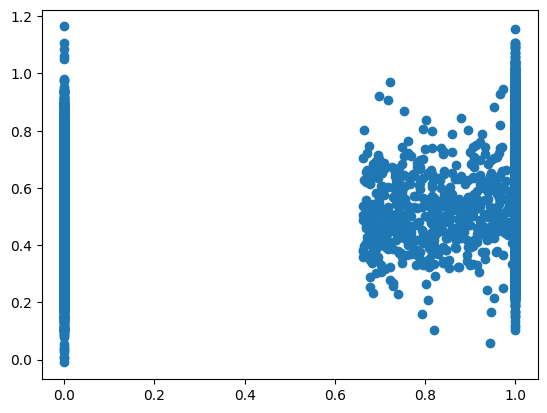

In [ ]:
predictions_LSTM = model.predict([X_test_seq1, X_test_seq2, X_test])
evaluate_model(y_test, predictions_LSTM, y_test_start, y_test_end)

In [ ]:
def evaluate_non_nn_model(y_true, predictions, y_test_start, y_test_end):
    y_true = np.argmax(y_true, axis = 1)
    # Get accuracy, precision, recall, f1-score
    print("Classification Report:")
    print(classification_report(y_true, np.argmax(predictions, axis = 1)))

    # Get confusion matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, np.argmax(predictions, axis = 1))
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', 
                xticklabels = ['Non-Transcribe ', 'Transcribe'], 
                yticklabels = ['Non-Transcribe ', 'Transcribe'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, predictions[:, 1])
    plt.plot(fpr, tpr)
    plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), c = 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # Plot Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_true, predictions[:, 1])
    plt.plot(recall, precision)
    plt.plot([0, 1], [1, 0], c = 'r')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

    print("ROC-AUC Score:", roc_auc_score(y_true, predictions[:, 1]))
    print("Kappa:", cohen_kappa_score(y_true, np.argmax(predictions, axis = 1)))
    print("MCC:", matthews_corrcoef(y_true, np.argmax(predictions, axis = 1)))


In [ ]:
Train = np.concatenate([X_train_seq1, X_train], axis = 1)
Test = np.concatenate([X_test_seq1, X_test], axis = 1)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.15      0.25     16237
           1       0.56      0.93      0.70     19154

    accuracy                           0.57     35391
   macro avg       0.60      0.54      0.47     35391
weighted avg       0.60      0.57      0.49     35391

Confusion Matrix:


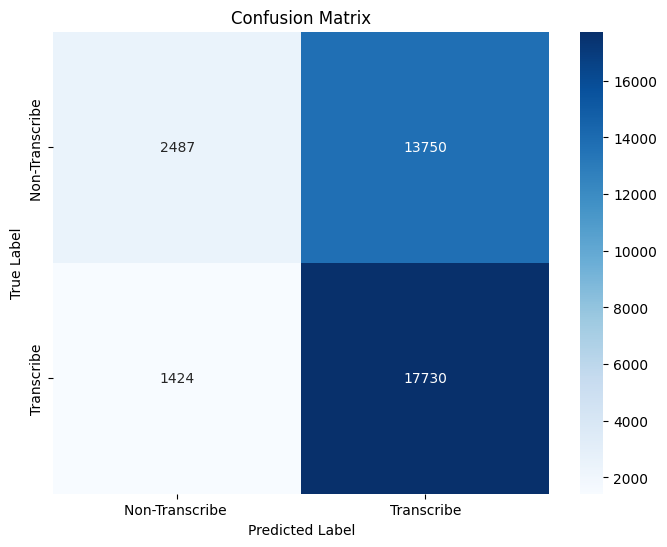

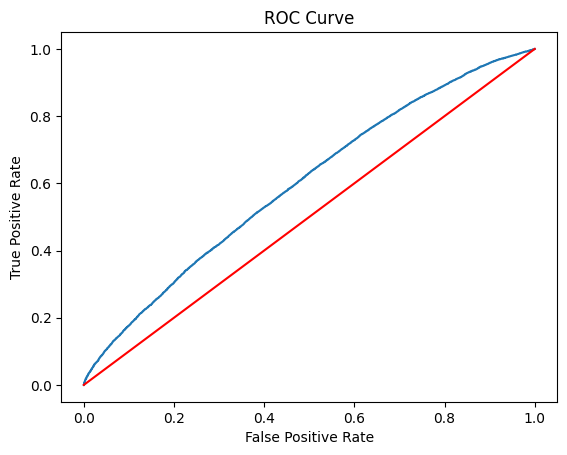

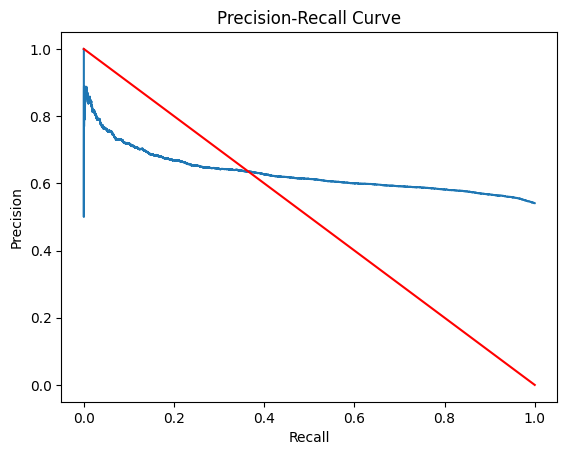

ROC-AUC Score: 0.5979304965888198
Kappa: 0.08365983817539868
MCC: 0.1252792977282656


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 1024, max_depth = 11)
random_forest.fit(Train, np.argmax(y_train, axis = 1))
predictions_random_forest = random_forest.predict_proba(Test)
evaluate_non_nn_model(y_test, predictions_random_forest, y_test_start, y_test_end)

c:\Users\misha\anaconda3\envs\tfgpu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.40      0.46     16237
           1       0.58      0.71      0.64     19154

    accuracy                           0.57     35391
   macro avg       0.56      0.55      0.55     35391
weighted avg       0.56      0.57      0.56     35391

Confusion Matrix:


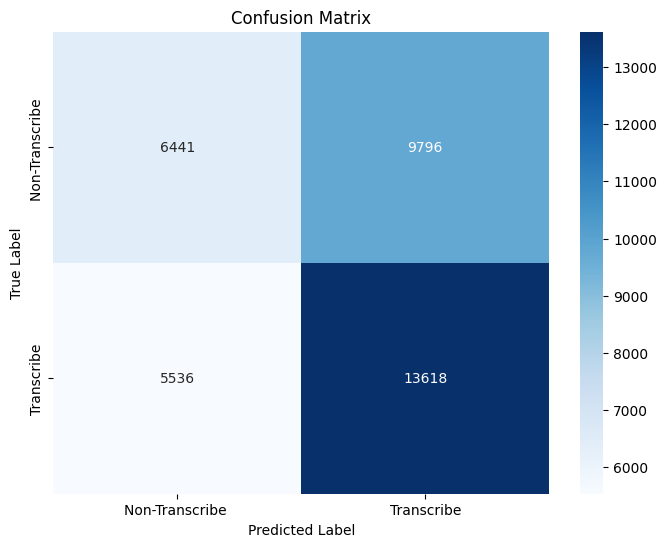

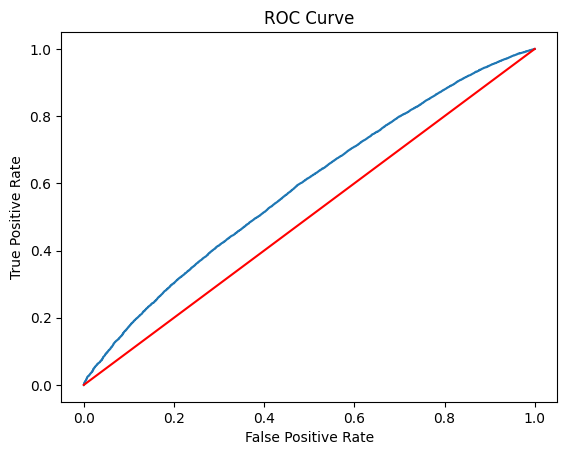

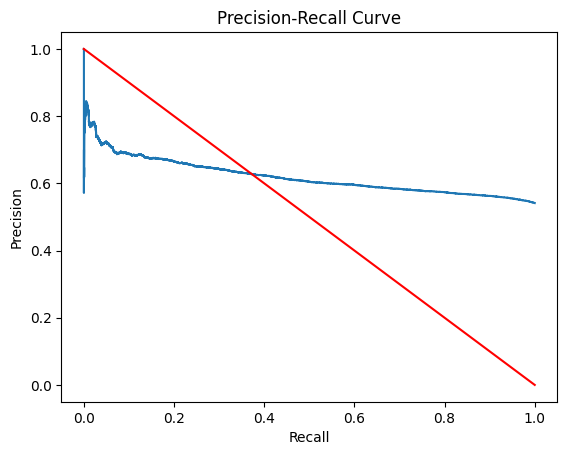

ROC-AUC Score: 0.5875079417917028
Kappa: 0.1098554754474328
MCC: 0.11337788824702746


In [ ]:
ada = AdaBoostClassifier(n_estimators = 1024)
ada.fit(Train, np.argmax(y_train, axis = 1))
predictions_ada = ada.predict_proba(Test)
evaluate_non_nn_model(y_test, predictions_ada, y_test_start, y_test_end)

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.37      0.45     16237
           1       0.59      0.76      0.66     19154

    accuracy                           0.58     35391
   macro avg       0.58      0.56      0.55     35391
weighted avg       0.58      0.58      0.56     35391

Confusion Matrix:


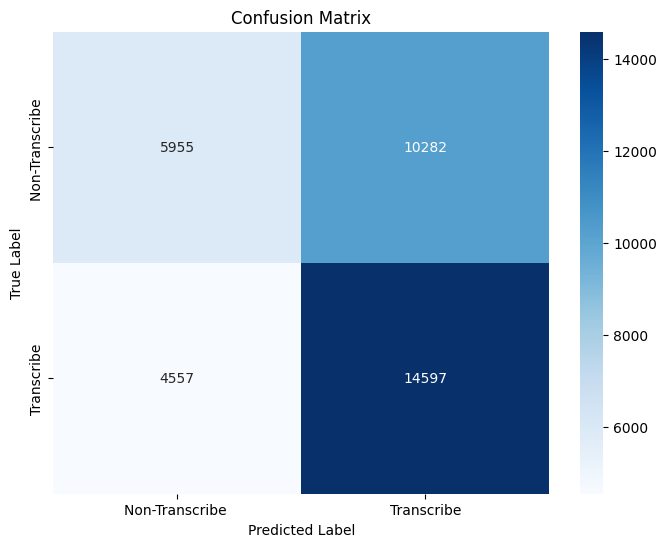

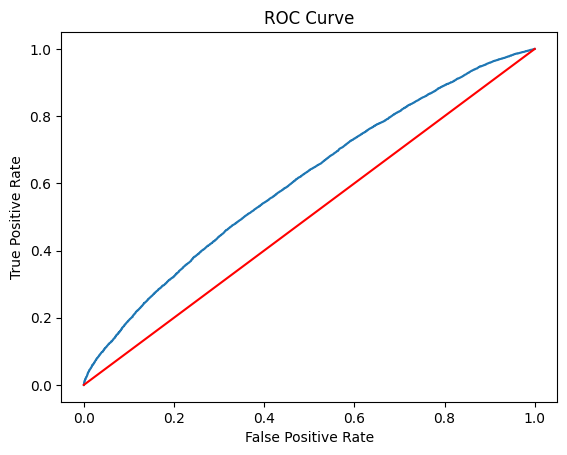

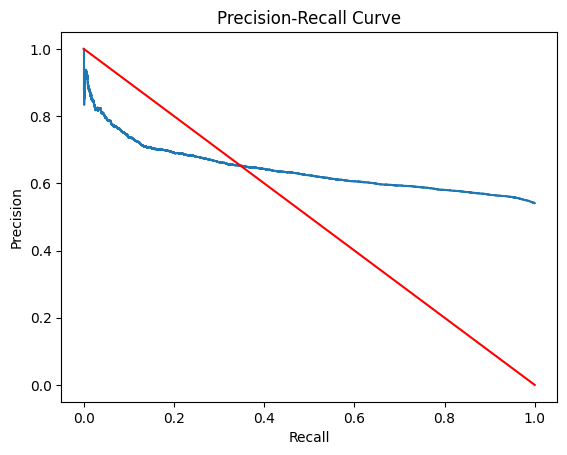

ROC-AUC Score: 0.6059696408945214
Kappa: 0.13239579149145753
MCC: 0.1405006167119446


In [27]:
gbc = GradientBoostingClassifier(n_estimators = 256, max_depth = 3)
gbc.fit(Train, np.argmax(y_train, axis = 1))
predictions_gbc = gbc.predict_proba(Test)
evaluate_non_nn_model(y_test, predictions_gbc, y_test_start, y_test_end)

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.40      0.46     16237
           1       0.59      0.71      0.64     19154

    accuracy                           0.57     35391
   macro avg       0.57      0.56      0.55     35391
weighted avg       0.57      0.57      0.56     35391

Confusion Matrix:


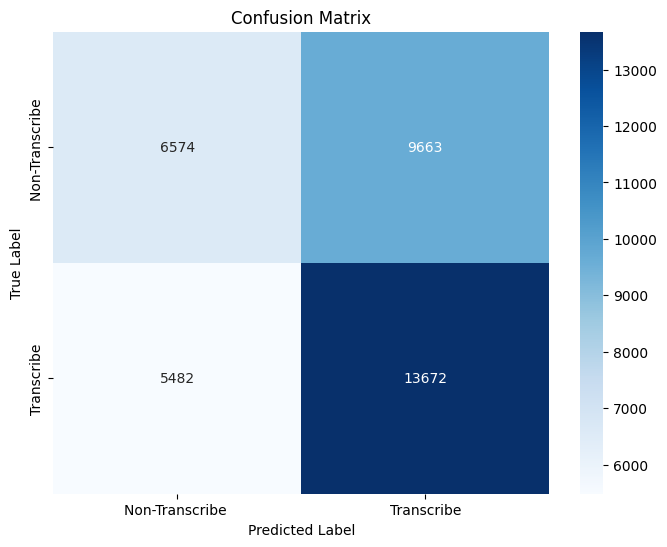

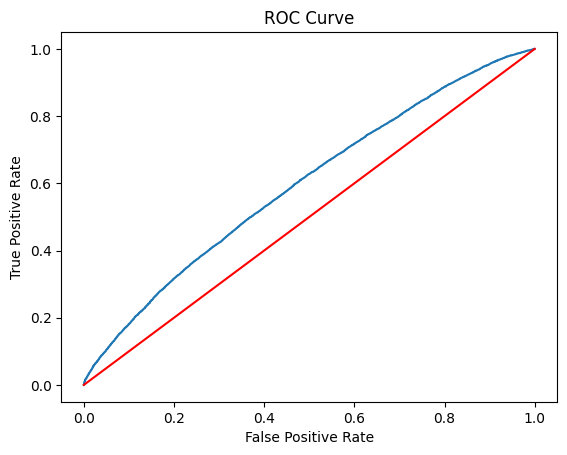

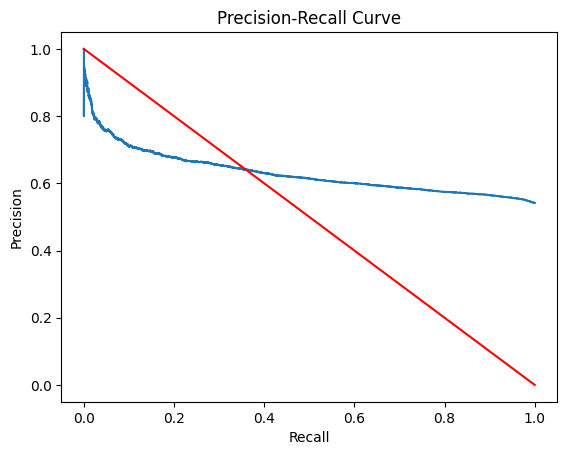

ROC-AUC Score: 0.5960203058552094
Kappa: 0.121044588733481
MCC: 0.12477353861446529


In [28]:
xgb = XGBClassifier(n_estimators = 256, max_depth = 3)
xgb.fit(Train, np.argmax(y_train, axis = 1))
predictions_xgb = xgb.predict_proba(Test)
evaluate_non_nn_model(y_test, predictions_xgb, y_test_start, y_test_end)

Learning rate set to 0.297875
0:	learn: 0.6874744	total: 1.63s	remaining: 6m 56s
1:	learn: 0.6839199	total: 1.77s	remaining: 3m 44s
2:	learn: 0.6812022	total: 2s	remaining: 2m 48s
3:	learn: 0.6794037	total: 2.23s	remaining: 2m 20s
4:	learn: 0.6781187	total: 2.5s	remaining: 2m 5s
5:	learn: 0.6772432	total: 2.63s	remaining: 1m 49s
6:	learn: 0.6764928	total: 2.81s	remaining: 1m 40s
7:	learn: 0.6759626	total: 3s	remaining: 1m 32s
8:	learn: 0.6754837	total: 3.07s	remaining: 1m 24s
9:	learn: 0.6749954	total: 3.21s	remaining: 1m 18s
10:	learn: 0.6746498	total: 3.31s	remaining: 1m 13s
11:	learn: 0.6744390	total: 3.41s	remaining: 1m 9s
12:	learn: 0.6739991	total: 3.65s	remaining: 1m 8s
13:	learn: 0.6736615	total: 3.73s	remaining: 1m 4s
14:	learn: 0.6733413	total: 3.97s	remaining: 1m 3s
15:	learn: 0.6731382	total: 4.07s	remaining: 1m
16:	learn: 0.6729537	total: 4.19s	remaining: 58.9s
17:	learn: 0.6727734	total: 4.3s	remaining: 56.8s
18:	learn: 0.6725810	total: 4.46s	remaining: 55.6s
19:	learn: 0

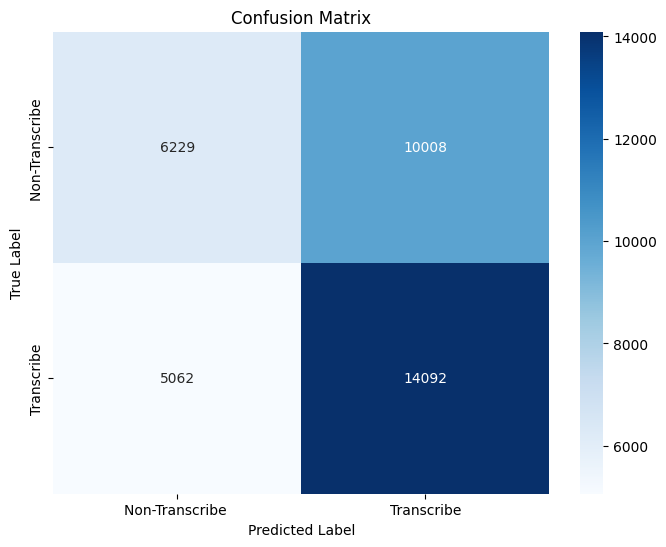

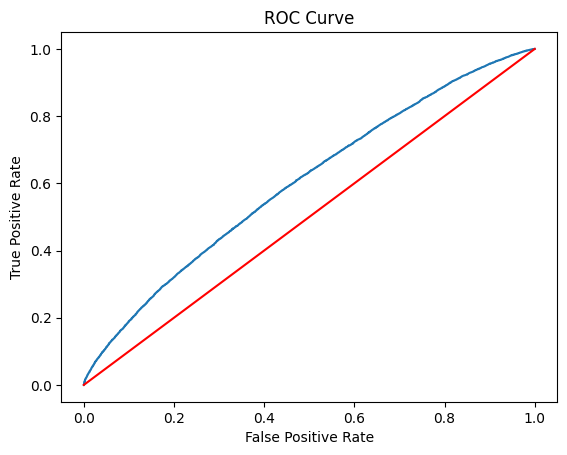

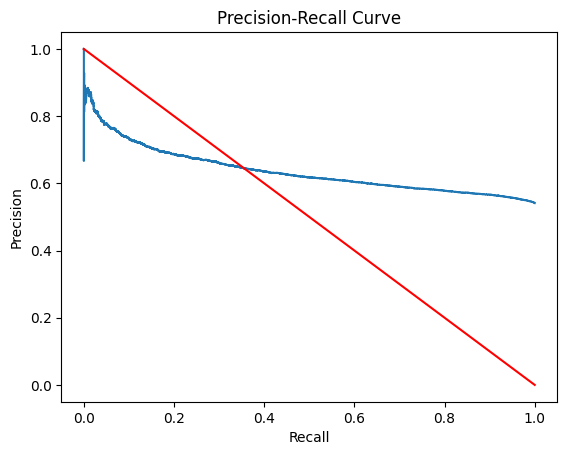

ROC-AUC Score: 0.601327558058527
Kappa: 0.12218506761569325
MCC: 0.12759507106315002


In [29]:
catboost = CatBoostClassifier(iterations = 256, depth = 3)
catboost.fit(Train, np.argmax(y_train, axis = 1))
predictions_catboost = catboost.predict_proba(Test)
evaluate_non_nn_model(y_test, predictions_catboost, y_test_start, y_test_end)

In [32]:
sns.set(style="whitegrid")

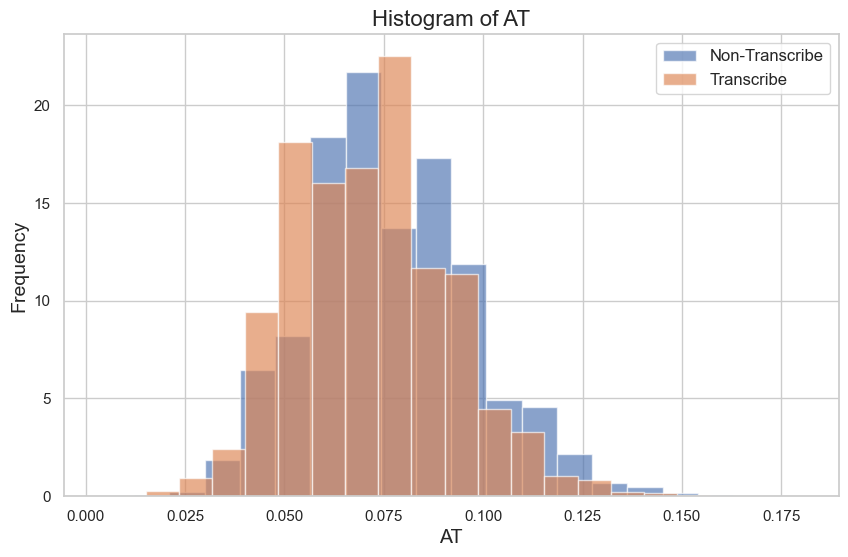

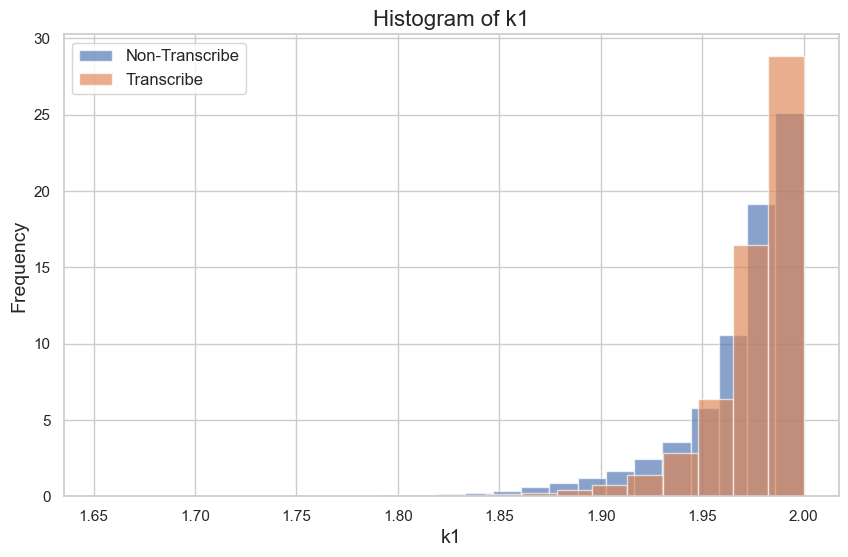

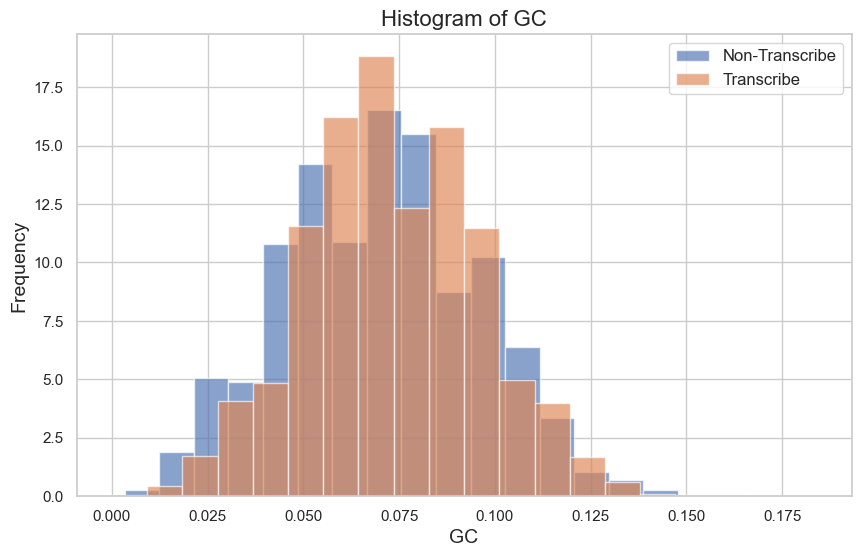

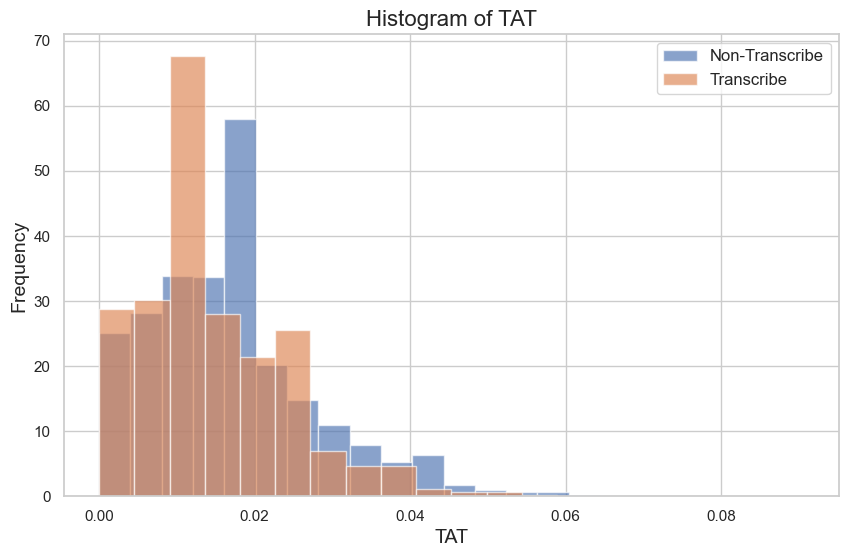

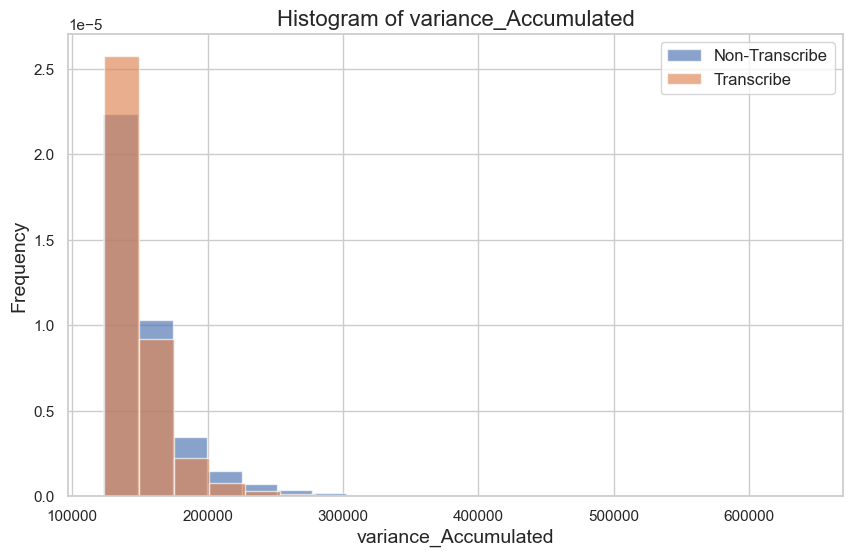

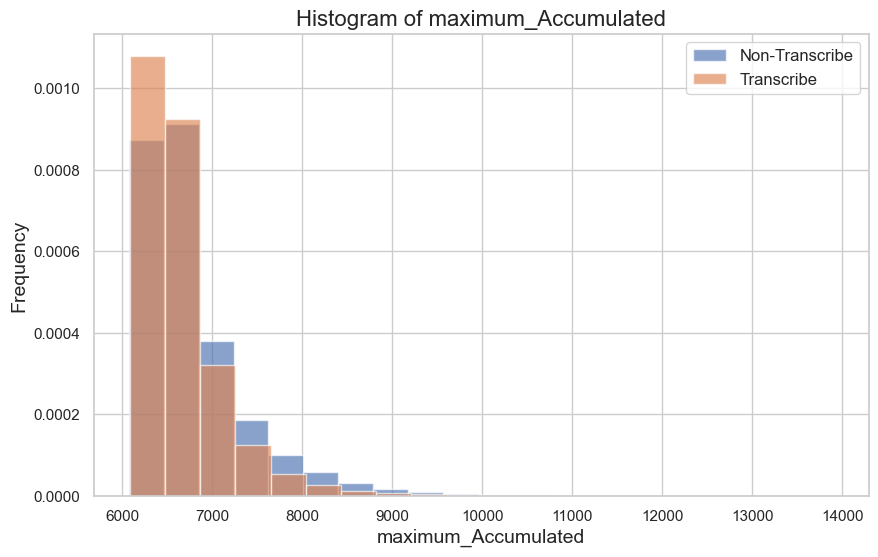

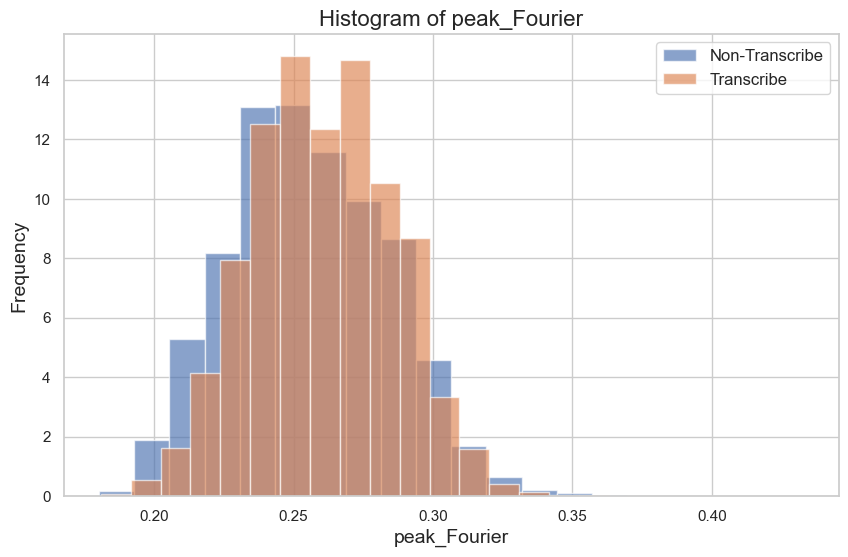

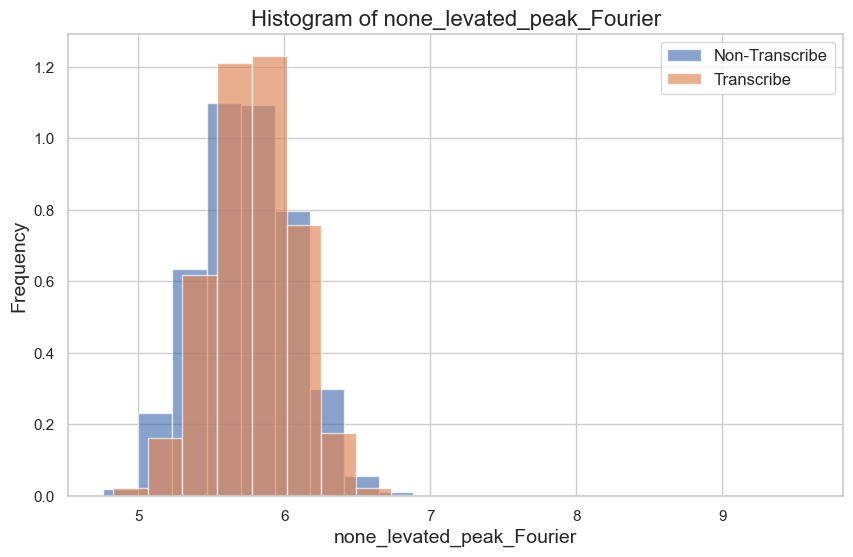

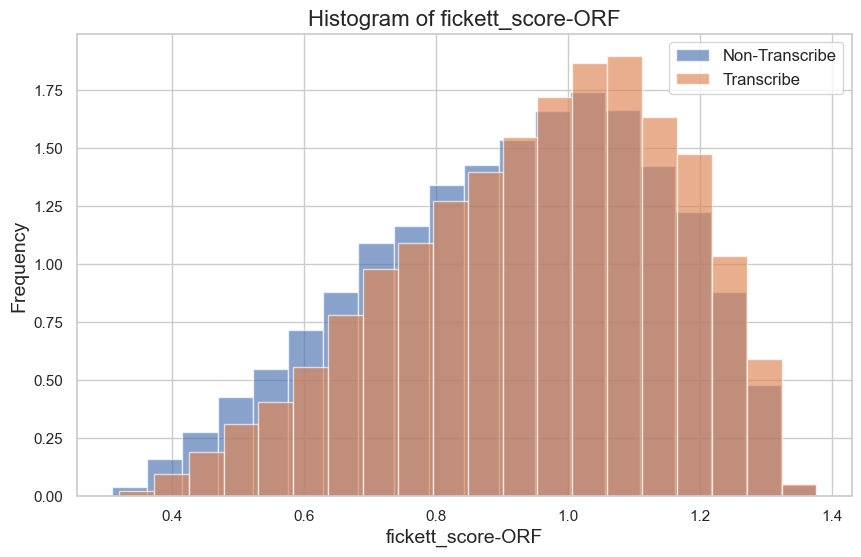

In [37]:
grouped = df.groupby("label")

for feature in ["AT", "k1", "GC", "TAT", 
                'variance_Accumulated', 'maximum_Accumulated', 
                'peak_Fourier','none_levated_peak_Fourier', 'fickett_score-ORF']:
    plt.figure(figsize = (10, 6))
    for name, group in grouped:
        name = "Non-Transcribe" if name == 0 else "Transcribe"
        plt.hist(group[feature], bins = 20, alpha = 0.66, label = f'{name}', density=True)
    plt.title(f'Histogram of {feature}', fontsize = 16)
    plt.xlabel(feature, fontsize = 14)
    plt.ylabel('Frequency', fontsize = 14)
    plt.legend(fontsize = 12)
    plt.grid(True)
    plt.show()

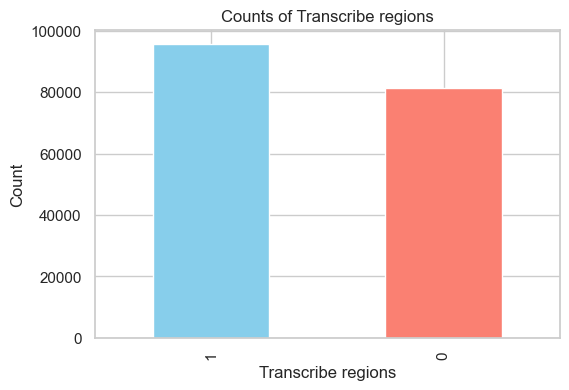

In [34]:
plt.figure(figsize = (6, 4))
df['label'].value_counts().plot(kind = 'bar', color = ['skyblue', 'salmon'])
plt.title('Counts of Transcribe regions')
plt.xlabel('Transcribe regions')
plt.ylabel('Count')
plt.show()

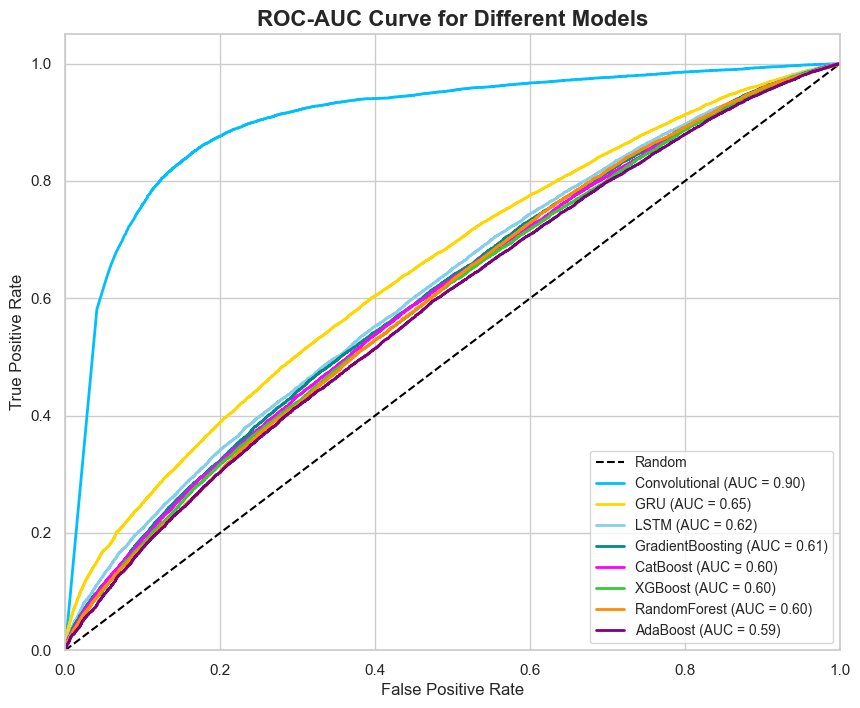

In [58]:
colors = {
    "Convolutional": 'deepskyblue',
    "GRU": 'gold',
    "LSTM": 'skyblue',
    "GradientBoosting": 'darkcyan',
    "CatBoost": 'magenta',
    "XGBoost": 'limegreen',
    "RandomForest": 'darkorange',
    "AdaBoost": 'purple',
}

models = {
    "Convolutional": predictions_conv[0],
    "GRU": predictions_GRU[0],
    "LSTM": predictions_LSTM[0],
    "GradientBoosting": predictions_gbc,
    "CatBoost": predictions_catboost,
    "XGBoost": predictions_xgb,
    "RandomForest": predictions_random_forest,
    "AdaBoost": predictions_ada,
}

plt.figure(figsize=(10, 8))

plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random')

for name, predictions in models.items():
    fpr, tpr, _ = roc_curve(np.argmax(y_test, axis=1), predictions[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[name], linestyle='-', linewidth=2,
             label='%s (AUC = %0.2f)' % (name, roc_auc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Different Models', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

plt.show()


In [64]:
loss = history.history['out_classification_loss']
acc = history.history['out_classification_accuracy']
val_loss = history.history['val_out_classification_loss']
val_acc = history.history['val_out_classification_accuracy']

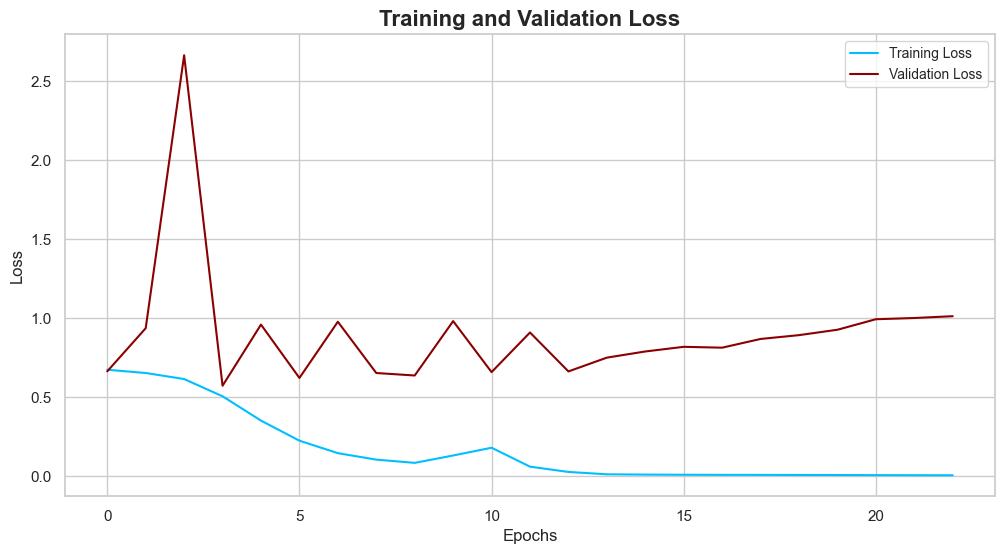

In [70]:
train_color = 'deepskyblue'
val_color = 'darkred'

plt.figure(figsize=(12, 6))
plt.plot(loss, color=train_color, label='Training Loss')
plt.plot(val_loss, color=val_color, label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


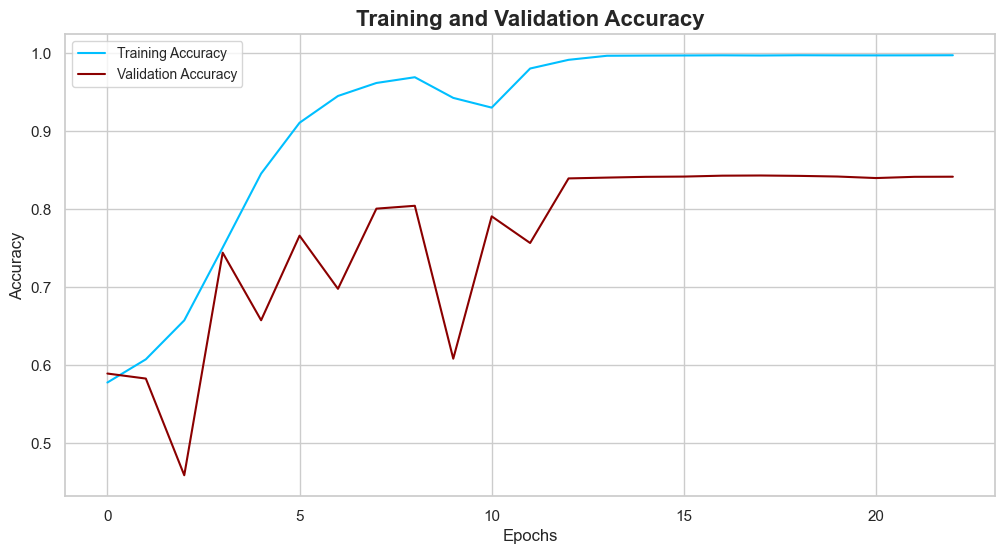

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(acc, color=train_color, label='Training Accuracy')
plt.plot(val_acc, color=val_color, label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()